## Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Target Variable is the SalePrice.

## Importing Required Libraries

In [508]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

warnings.filterwarnings('ignore')
%matplotlib inline

## Reading and Understanding the data

In [509]:
# reading the dataset
housingdf = pd.read_csv("train.csv")
housingdf.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [510]:
print(housingdf.shape)

(1460, 81)


In [511]:
print(housingdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [512]:
housingdf.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## EDA and Data Cleaning

In [513]:
housingdf.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [514]:
## As we notice that there are null values, let's check if there are any entire row that is null
housingdf[(housingdf.isnull().all(axis=1) == True)]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [515]:
## Similarly let's check if there are any entire column with null values
housingdf.isnull().all(axis=0).sum()

0

In [516]:
## As there are no entire row or column with null values, let's check for the columns where the null value count is > 0
housingdf.isnull().sum()[(housingdf.isnull().sum()>0)]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [517]:
## Now let's check for the percentage of null values
round(100*housingdf.isnull().sum()[(housingdf.isnull().sum()>0)]/len(housingdf), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

#### Based on the above, we can see that "PoolQC", "Alley", "MiscFeature" columns have more than 90% null values. Taking into consideration the data dictionary info, we can determine that these columns can be considered to have single values and can be dropped.

In [518]:
## Dropping the columns
housingdf.drop(["Alley", "PoolQC", "MiscFeature"], axis=1, inplace=True)

housingdf.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea Fence MiscVal  \
0    AllPub    Inside  ...         0           0        0   NaN       0   
1    AllPub       FR2  ...         0           0        0   NaN       0   
2    AllPub    Inside  ...         0           0        0   NaN       0   
3    AllPub    Corner  ...         0           0        0   NaN       0   
4    AllPub       FR2  ...         0           0        0   NaN       0   

  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0      2    2008        WD         Normal     208500  
1      5    2007        WD         Normal     181500  
2      9    2008        WD         Normal     223500  
3      2    2006        WD        Abnorml     140000  
4     12    2008        WD         Normal     250000  

[5 rows x 78 columns]

### Check for Duplicate rows

In [519]:
print(housingdf.shape)
#check the duplicate reords
print(housingdf.duplicated(subset=None, keep='first').count())

(housingdf[housingdf.duplicated(keep=False)])

(1460, 78)
1460


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Fence, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 78 columns]

##### Based on the above data we notice that there is no duplicate rows

### Deleting columns which have more than 90% similar value to avoid skewness of data

In [520]:
## Dropping ID column as it is not relevant for the analysis
housingdf.drop("Id", axis = 1, inplace = True)

housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea Fence  \
0    AllPub    Inside       Gtl  ...         0           0        0   NaN   
1    AllPub       FR2       Gtl  ...         0           0        0   NaN   
2    AllPub    Inside       Gtl  ...         0           0        0   NaN   
3    AllPub    Corner       Gtl  ...         0           0        0   NaN   
4    AllPub       FR2       Gtl  ...         0           0        0   NaN   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    2008        WD         Normal    208500  
1       0       5    2007        WD         Normal    181500  
2       0       9    2008        WD         Normal    223500  
3       0       2    2006        WD        Abnorml    140000  
4       0      12    2008        WD         Normal    250000  

[5 rows x 77 columns]

In [521]:
columnList = []   
for col in (housingdf):
    if(housingdf[col].value_counts().max() >= 1314): ## 1314 is 90% of 1460 
        columnList.append(col)


# Remove the columns with skewed data
print(columnList)
housingdf.drop(columnList, axis = 1, inplace = True)

housingdf.head()

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  Neighborhood Condition1 BldgType  ... GarageQual  WoodDeckSF  OpenPorchSF  \
0      CollgCr       Norm     1Fam  ...         TA           0           61   
1      Veenker      Feedr     1Fam  ...         TA         298            0   
2      CollgCr       Norm     1Fam  ...         TA           0           42   
3      Crawfor       Norm     1Fam  ...         TA           0           35   
4      NoRidge       Norm     1Fam  ...         TA         192           84   

   EnclosedPorch  Fence MoSold YrSold SaleType SaleCondition  SalePrice  
0              0    NaN      2   2008       WD        Normal     208500  
1              0    NaN      5   2007       WD        Normal     181500  
2              0    NaN      9   2008       WD        Normal     223500  
3            272    NaN      2   2006       WD       Abnorml     140000  
4              0    NaN     12   2008       WD        Normal     250000  

[5 rows x 59 columns]

In [522]:
## Checking null value after removing the columns

round(100*housingdf.isnull().sum()[(housingdf.isnull().sum()>0)]/len(housingdf), 2)

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
Fence           80.75
dtype: float64

In [523]:
## As Fence column has NaN values, imputting it to "No Fence"
# impute the value to fence columns
housingdf["Fence"] = housingdf["Fence"].astype('str')
housingdf["Fence"] = housingdf["Fence"].str.replace("nan", "No Fence")

print(housingdf["Fence"].describe())
print(housingdf["Fence"].value_counts())

count         1460
unique           5
top       No Fence
freq          1179
Name: Fence, dtype: object
No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64


In [524]:
# impute the value to nullable rows for GarageFinish
housingdf["GarageFinish"] = housingdf["GarageFinish"].fillna("No Garage")

In [525]:
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  Neighborhood Condition1 BldgType  ... GarageQual  WoodDeckSF  OpenPorchSF  \
0      CollgCr       Norm     1Fam  ...         TA           0           61   
1      Veenker      Feedr     1Fam  ...         TA         298            0   
2      CollgCr       Norm     1Fam  ...         TA           0           42   
3      Crawfor       Norm     1Fam  ...         TA           0           35   
4      NoRidge       Norm     1Fam  ...         TA         192           84   

   EnclosedPorch     Fence MoSold YrSold SaleType SaleCondition  SalePrice  
0              0  No Fence      2   2008       WD        Normal     208500  
1              0  No Fence      5   2007       WD        Normal     181500  
2              0  No Fence      9   2008       WD        Normal     223500  
3            272  No Fence      2   2006       WD       Abnorml     140000  
4              0  No Fence     12   2008       WD        Normal     250000  

[5 rows x 59 columns]

In [526]:
print(housingdf
["FireplaceQu"],["GarageFinish"])

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object ['GarageFinish']


In [527]:
# imputing vaules to LotFrontage column
housingdf["LotFrontage"] = housingdf["LotFrontage"].replace(np.nan, housingdf["LotFrontage"].median())

In [528]:
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  Neighborhood Condition1 BldgType  ... GarageQual  WoodDeckSF  OpenPorchSF  \
0      CollgCr       Norm     1Fam  ...         TA           0           61   
1      Veenker      Feedr     1Fam  ...         TA         298            0   
2      CollgCr       Norm     1Fam  ...         TA           0           42   
3      Crawfor       Norm     1Fam  ...         TA           0           35   
4      NoRidge       Norm     1Fam  ...         TA         192           84   

   EnclosedPorch     Fence MoSold YrSold SaleType SaleCondition  SalePrice  
0              0  No Fence      2   2008       WD        Normal     208500  
1              0  No Fence      5   2007       WD        Normal     181500  
2              0  No Fence      9   2008       WD        Normal     223500  
3            272  No Fence      2   2006       WD       Abnorml     140000  
4              0  No Fence     12   2008       WD        Normal     250000  

[5 rows x 59 columns]

In [529]:
print(housingdf["LotFrontage"].describe())
print(housingdf["LotFrontage"].value_counts())

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64


<Axes: xlabel='Fence', ylabel='SalePrice'>

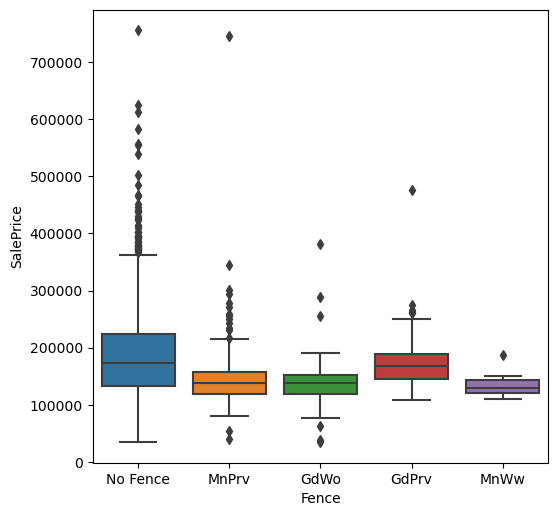

In [530]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = housingdf)

#### Data shows that 80% does not contain fence

In [531]:
## Analysing and imputting basement related data
housingdf["BsmtQual"] = housingdf["BsmtQual"].fillna("None")
housingdf["BsmtQual"].value_counts()
housingdf["BsmtQual"].value_counts()/len(housingdf)*100

TA      44.452055
Gd      42.328767
Ex       8.287671
None     2.534247
Fa       2.397260
Name: BsmtQual, dtype: float64

In [532]:
housingdf["BsmtCond"] = housingdf["BsmtCond"].fillna("None")
housingdf["BsmtCond"].value_counts()
housingdf["BsmtCond"].value_counts()/len(housingdf)*100

TA      89.794521
Gd       4.452055
Fa       3.082192
None     2.534247
Po       0.136986
Name: BsmtCond, dtype: float64

In [533]:
housingdf["BsmtExposure"] = housingdf["BsmtExposure"].fillna("None")
housingdf["BsmtExposure"].value_counts()
housingdf["BsmtExposure"].value_counts()/len(housingdf)*100

No      65.273973
Av      15.136986
Gd       9.178082
Mn       7.808219
None     2.602740
Name: BsmtExposure, dtype: float64

In [534]:
housingdf["BsmtFinType1"] = housingdf["BsmtFinType1"].fillna("None")
housingdf["BsmtFinType1"].value_counts()
housingdf["BsmtFinType1"].value_counts()/len(housingdf)*100

Unf     29.452055
GLQ     28.630137
ALQ     15.068493
BLQ     10.136986
Rec      9.109589
LwQ      5.068493
None     2.534247
Name: BsmtFinType1, dtype: float64

In [535]:
housingdf["BsmtFinType2"] = housingdf["BsmtFinType2"].fillna("None")
housingdf["BsmtFinType2"].value_counts()
housingdf["BsmtFinType2"].value_counts()/len(housingdf)*100

Unf     86.027397
Rec      3.698630
LwQ      3.150685
None     2.602740
BLQ      2.260274
ALQ      1.301370
GLQ      0.958904
Name: BsmtFinType2, dtype: float64

In [536]:
# basement columns:
house_Basement = housingdf[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1", "BsmtFinSF2",
                         "BsmtUnfSF","TotalBsmtSF"]]
house_Basement

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
0          Gd       TA           No          GLQ          Unf         706   
1          Gd       TA           Gd          ALQ          Unf         978   
2          Gd       TA           Mn          GLQ          Unf         486   
3          TA       Gd           No          ALQ          Unf         216   
4          Gd       TA           Av          GLQ          Unf         655   
...       ...      ...          ...          ...          ...         ...   
1455       Gd       TA           No          Unf          Unf           0   
1456       Gd       TA           No          ALQ          Rec         790   
1457       TA       Gd           No          GLQ          Unf         275   
1458       TA       TA           Mn          GLQ          Rec          49   
1459       TA       TA           No          BLQ          LwQ         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
0              0        150          856  
1              0        284         1262  
2              0        434          920  
3              0        540          756  
4              0        490         1145  
...          ...        ...          ...  
1455           0        953          953  
1456         163        589         1542  
1457           0        877         1152  
1458        1029          0         1078  
1459         290        136         1256  

[1460 rows x 9 columns]

<Figure size 2000x1200 with 0 Axes>

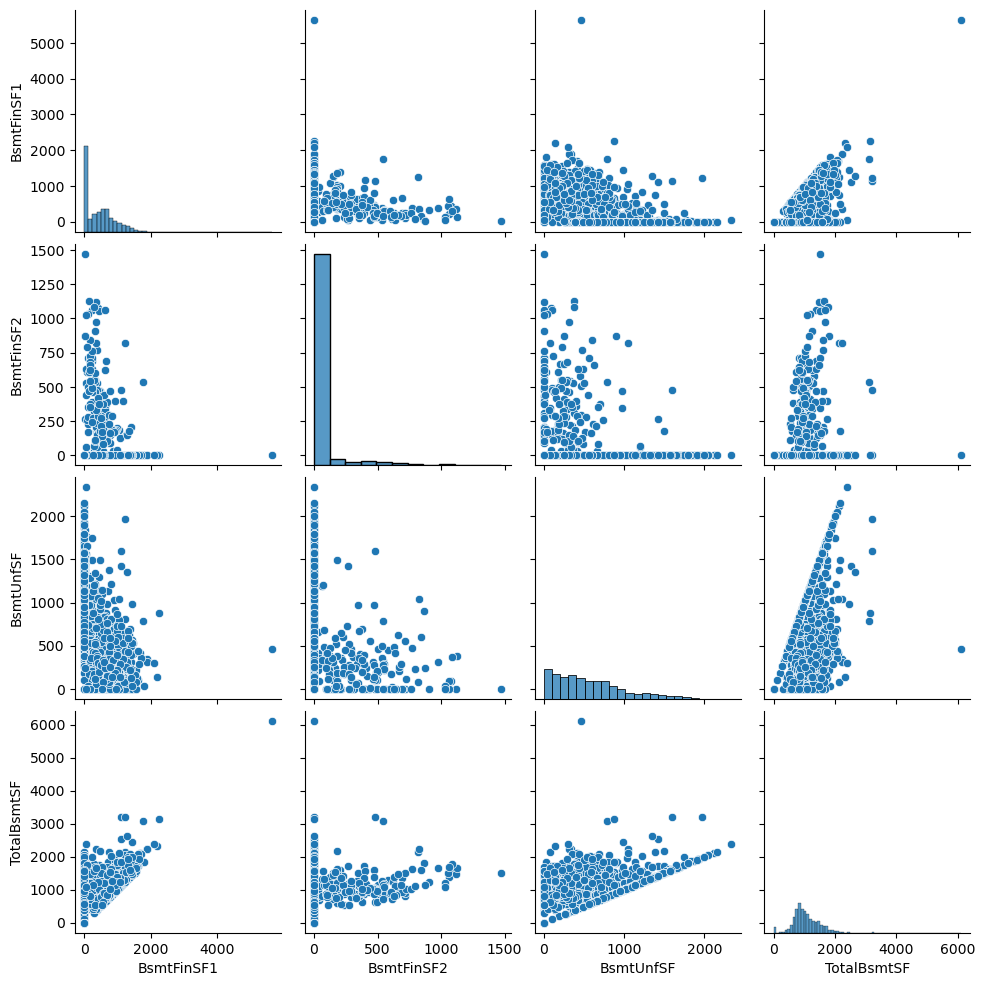

In [537]:
#plot a pair plot for basement related columns
plt.figure(figsize=(20, 12))
sns.pairplot(house_Basement)
plt.show()

##### Based on the above plot we can observe & determine that the we can drop "BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF"
- plotting the box plots remainig basement related colums to see the effect of those features with the target varibale Sales priice

<Axes: xlabel='BsmtFinType2', ylabel='SalePrice'>

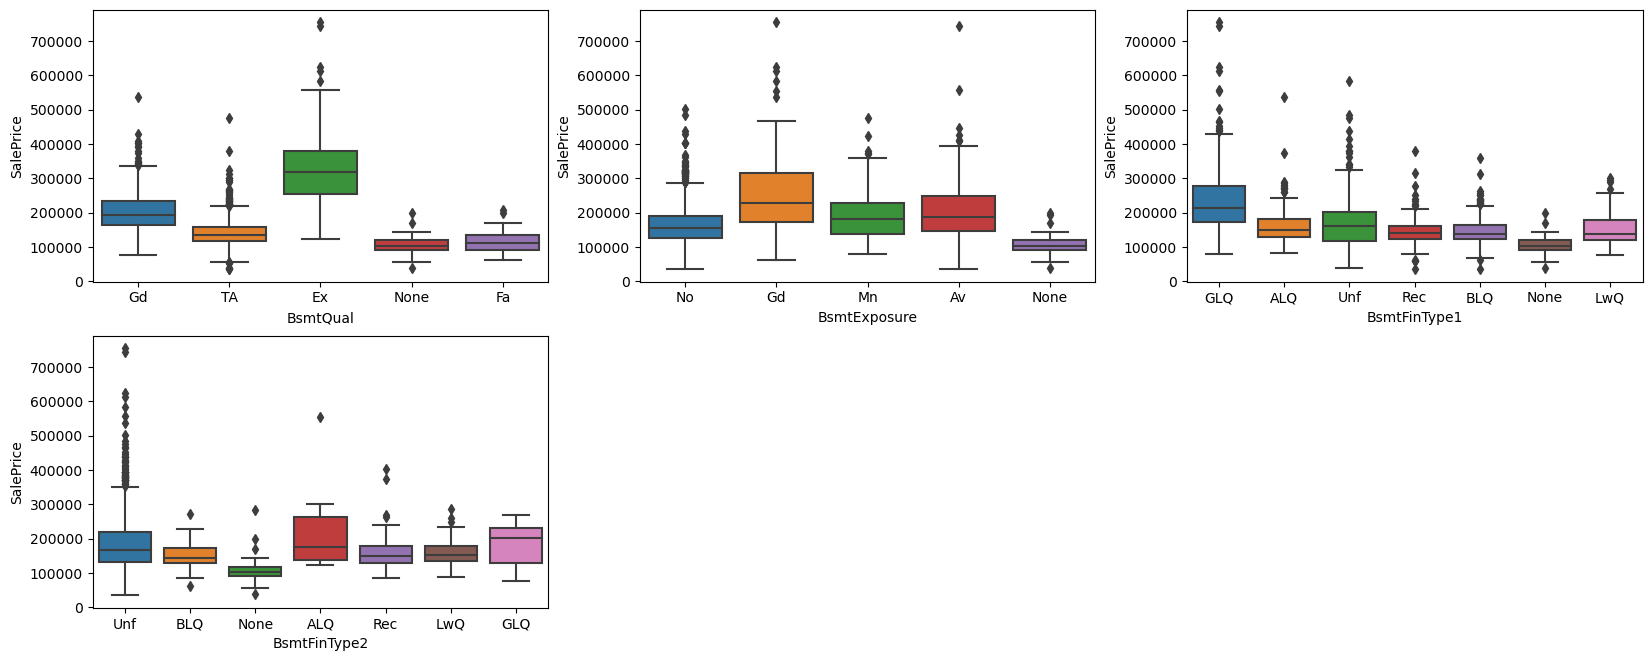

In [538]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housingdf)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housingdf)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = housingdf)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = housingdf)

##### Confirmed that we can drop BsmtFinType2, BsmtFinType1, BsmtExposure as they dont havemuch influence on sales price.
- dropping some of the basement related columns as they dont show much influence with the target variable

In [539]:
#drop the columns
basementcolList = ["BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF","BsmtFinType2", "BsmtFinType1", "BsmtExposure" ]
housingdf.drop(basementcolList, axis=1, inplace=True)
#cheking the shape of the house price data set after dropping basement variables
housingdf.shape

(1460, 53)

In [540]:
# imputing MasVnrArea column null values
housingdf["MasVnrArea"] = housingdf["MasVnrArea"].replace(np.nan, housingdf["MasVnrArea"].median())
housingdf["MasVnrArea"] = housingdf["MasVnrArea"].astype('int')

In [541]:
# checking for the remaining null values in the dataset
round(100*housingdf.isnull().sum()[(housingdf.isnull().sum()>0)]/len(housingdf), 2)

MasVnrType      0.55
FireplaceQu    47.26
GarageType      5.55
GarageYrBlt     5.55
GarageQual      5.55
dtype: float64

In [542]:
#GarageType, GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
housingdf["GarageYrBlt"] = housingdf["GarageYrBlt"].fillna(0)

In [543]:
housingdf["GarageType"] = housingdf["GarageType"].astype('str')
housingdf["GarageType"] = housingdf["GarageType"].str.replace("nan", "No Garage")
print(housingdf["GarageType"].describe())
print(housingdf["GarageType"].value_counts())
housingdf['GarageType'].value_counts()/len(housingdf['GarageType'])*100

count       1460
unique         7
top       Attchd
freq         870
Name: GarageType, dtype: object
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64


Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: GarageType, dtype: float64

In [544]:
housingdf['GarageYrBlt'].value_counts()/len(housingdf['GarageYrBlt'])*100

0.0       5.547945
2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
            ...   
1927.0    0.068493
1900.0    0.068493
1906.0    0.068493
1908.0    0.068493
1933.0    0.068493
Name: GarageYrBlt, Length: 98, dtype: float64

In [545]:
print(housingdf['GarageQual'].value_counts())
print(housingdf['GarageQual'].describe())
housingdf["GarageQual"] = housingdf["GarageQual"].str.replace("nan", "No Garage")
print(housingdf['GarageQual'].value_counts()/len(housingdf['GarageQual'])*100)

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: GarageQual, dtype: float64


##### it contains almost 90% of TA value in GargeQual so we can remove that column

In [546]:
print(housingdf["GarageFinish"].value_counts())
print(housingdf['GarageFinish'].value_counts()/len(housingdf['GarageFinish'])*100)

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64
Unf          41.438356
RFn          28.904110
Fin          24.109589
No Garage     5.547945
Name: GarageFinish, dtype: float64


#### plotting Garage related columns with the target variable Sales price

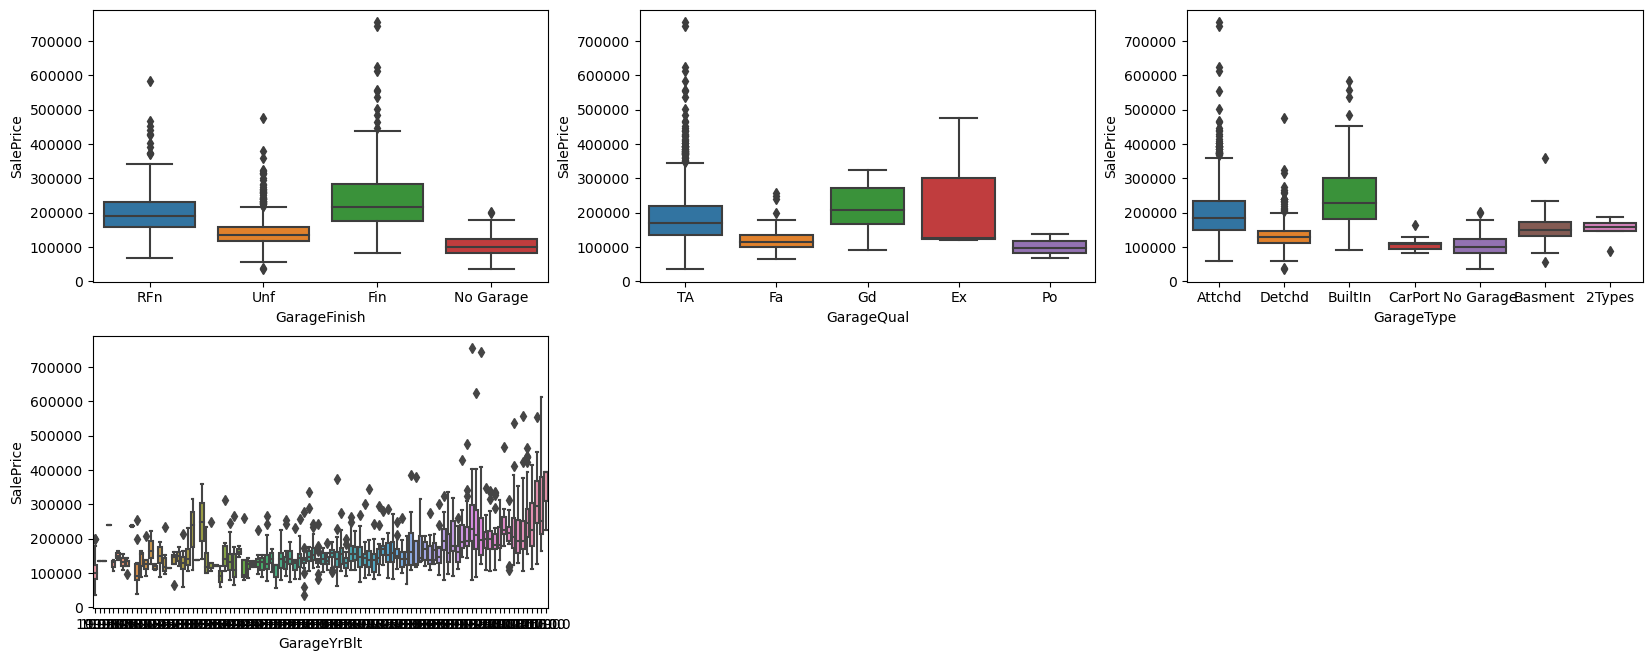

In [547]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housingdf)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = housingdf)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageType',y = 'SalePrice', data = housingdf)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageYrBlt',y = 'SalePrice', data = housingdf)
plt.show()

- from the plots plotted above and value_caounts calculation GarageQual, MasVnrArea are having less influence. So we can drop those

In [548]:
housingdf.drop("GarageQual", axis=1, inplace=True)
housingdf.shape

(1460, 52)

In [549]:
housingdf.drop("MasVnrArea", axis=1, inplace=True)
housingdf.shape

(1460, 51)

In [550]:
housingdf["FireplaceQu"] = housingdf["FireplaceQu"].fillna("No Fireplace")
housingdf["FireplaceQu"].head(20)

0     No Fireplace
1               TA
2               TA
3               Gd
4               TA
5     No Fireplace
6               Gd
7               TA
8               TA
9               TA
10    No Fireplace
11              Gd
12    No Fireplace
13              Gd
14              Fa
15    No Fireplace
16              TA
17    No Fireplace
18    No Fireplace
19    No Fireplace
Name: FireplaceQu, dtype: object

In [551]:
##MasVnrType column imputing and analyzing
housingdf['MasVnrType'] = housingdf['MasVnrType'].fillna("None")
housingdf['MasVnrType'].value_counts()/len(housingdf['MasVnrType'])*100

None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [552]:
round(100*housingdf.isnull().sum()[(housingdf.isnull().sum()>0)]/len(housingdf), 2)

Series([], dtype: float64)

In [553]:
housingdf.shape

(1460, 51)

In [554]:
#Correlation map to see how features are correlated with Sale Price
corrmap = housingdf.corr()
print(corrmap)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.083348  0.013788     0.550684     0.073741   
TotalBsmtSF     -0.238518     0.363472  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.413773  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072388  0.050986     0.295493     0.028942   
GrLivArea        0.074853     0.368007  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.090343  0.158155     0.111098   

<Axes: >

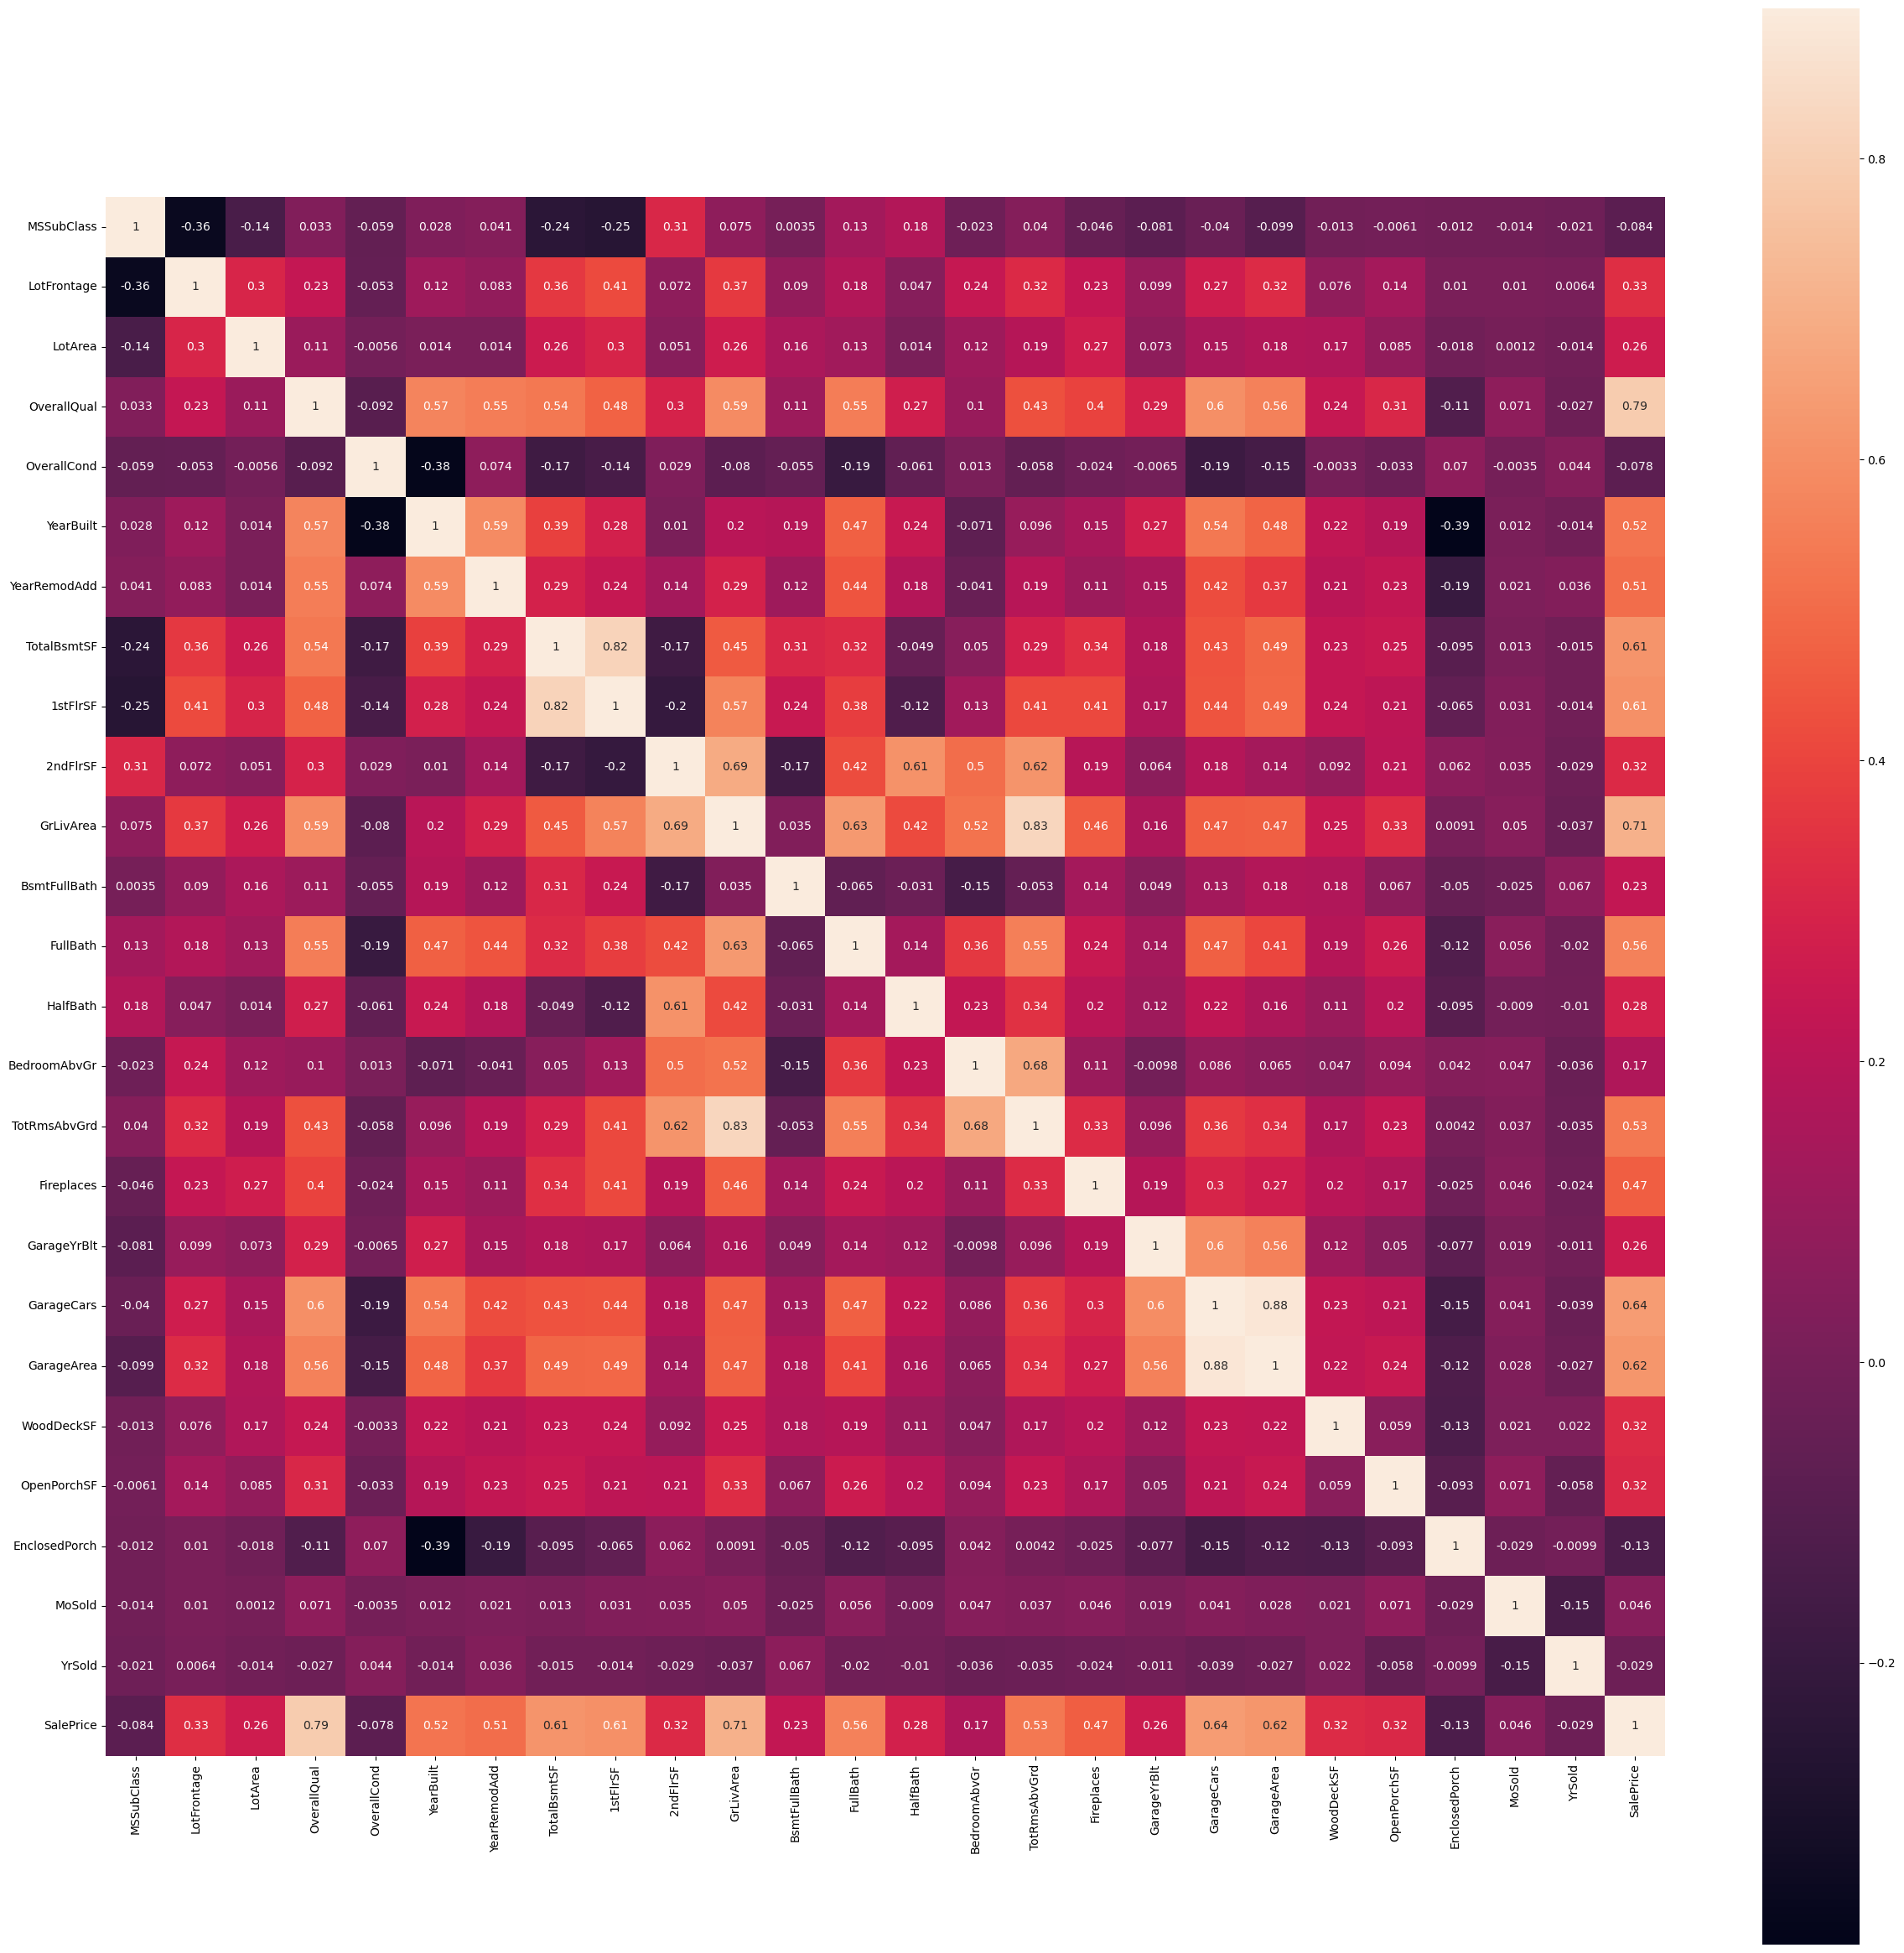

In [555]:
plt.subplots(figsize=(30,30))
sns.heatmap(corrmap, vmax=0.9, square=True, annot = True)

In [556]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housingdf.describe(percentiles=[.25,.5,.75,.90,.95,.99]).transpose()

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      69.863699     22.027677     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1868.739726    453.697295      0.0    1958.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       90%        95%        99%       max  
MSSubClass         50.0      70.00     120.0     160.00     190.00     190.0  
LotFrontage        69.0      79.00      92.0     104.00     137.41     313.0  
LotArea          9478.5   11601.50   14381.7   17401.15   37567.64  215245.0  
OverallQual         6.0       7.00       8.0       8.00      10.00      10.0  
OverallCond         5.0       6.00       7.0       8.00       9.00       9.0  
YearBuilt        1973.0    2000.00    2006.0    2007.00    2009.00    2010.0  
YearRemodAdd     1994.0    2004.00    2006.0    2007.00    2009.00    2010.0  
TotalBsmtSF       991.5    1298.25    1602.2    1753.00    2155.05    6110.0  
1stFlrSF         1087.0    1391.25    1680.0    1831.25    2219.46    4692.0  
2ndFlrSF            0.0     728.00     954.2    1141.05    1418.92    2065.0  
GrLivArea        1464.0    1776.75    2158.3    2466.10    3123.48    5642.0  
BsmtFullBath        0.0       1.00       1.0       1.00       2.00       3.0  
FullBath            2.0       2.00       2.0       2.00       3.00       3.0  
HalfBath            0.0       1.00       1.0       1.00       1.00       2.0  
BedroomAbvGr        3.0       3.00       4.0       4.00       5.00       8.0  
TotRmsAbvGrd        6.0       7.00       9.0      10.00      11.00      14.0  
Fireplaces          1.0       1.00       1.0       2.00       2.00       3.0  
GarageYrBlt      1977.0    2001.00    2006.0    2007.00    2009.00    2010.0  
GarageCars          2.0       2.00       3.0       3.00       3.00       4.0  
GarageArea        480.0     576.00     757.1     850.10    1002.79    1418.0  
WoodDeckSF          0.0     168.00     262.0     335.00     505.46     857.0  
OpenPorchSF        25.0      68.00     130.0     175.05     285.82     547.0  
EnclosedPorch       0.0       0.00     112.0     180.15     261.05     552.0  
MoSold              6.0       8.00      10.0      11.00      12.00      12.0  
YrSold           2008.0    2009.00    2010

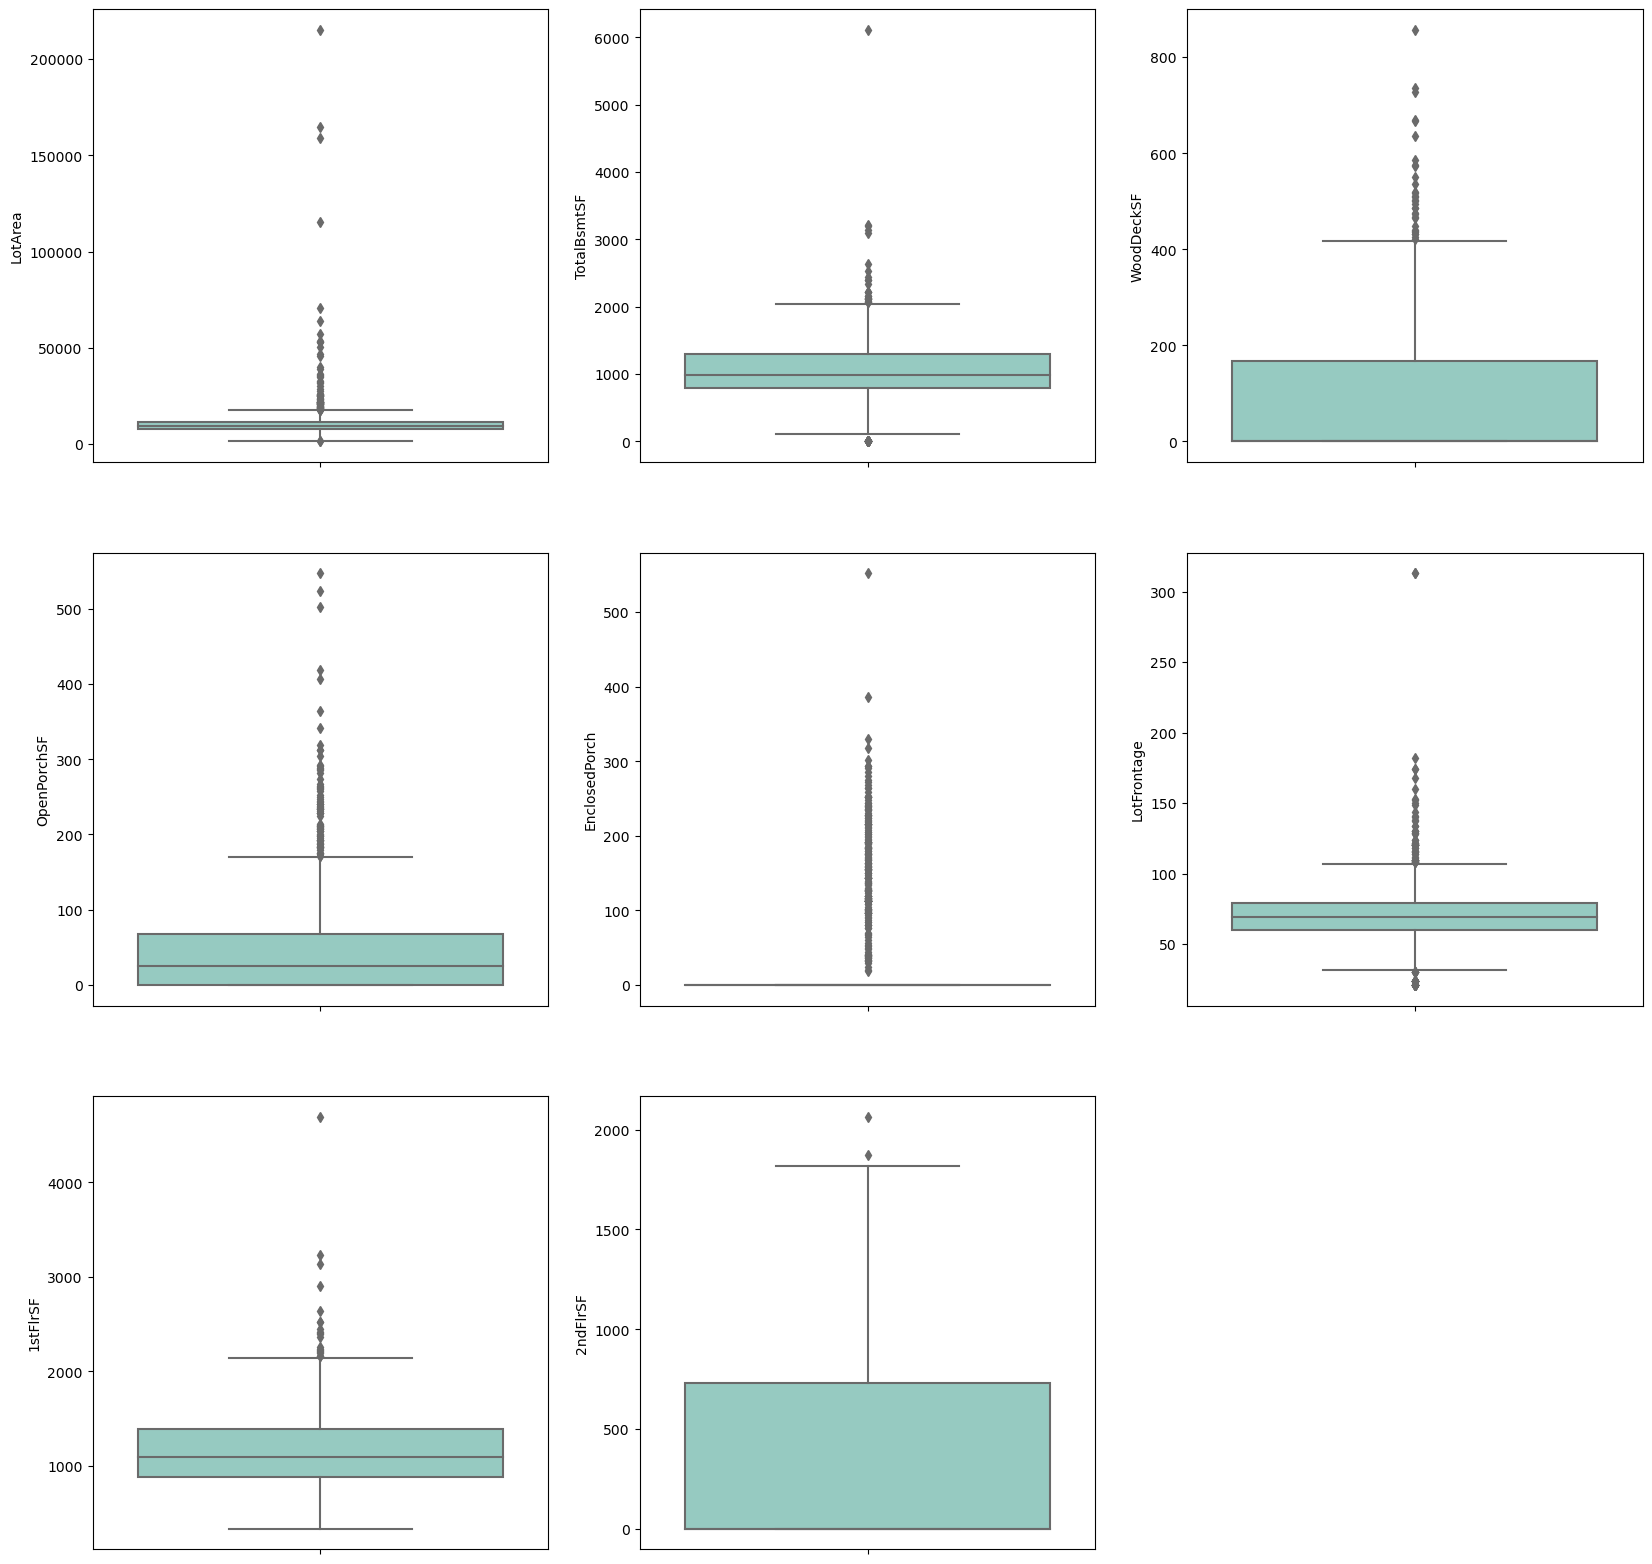

In [557]:
# checking for the outliers in all the numeric columns
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = housingdf)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF",palette='Set3', data = housingdf)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housingdf)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housingdf)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = housingdf)
plt.subplot(3,3,6)
sns.boxplot(y = 'LotFrontage', palette='Set3', data = housingdf)
plt.subplot(3,3,7)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = housingdf)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = housingdf)

plt.show()

In [558]:
# Removing Outliers

# Removing values beyond 99% for LotArea
housingdf = housingdf[housingdf["LotArea"] < housingdf['LotArea'].quantile(0.99)]

# Removing values beyond 99% for TotalBsmtSF
housingdf = housingdf[housingdf["TotalBsmtSF"] < housingdf['TotalBsmtSF'].quantile(0.99)]


# Removing values beyond 99% for WoodDeckSF
housingdf = housingdf[housingdf["WoodDeckSF"] < housingdf['WoodDeckSF'].quantile(0.99)]


# Removing values beyond 99% for OpenPorchSF
housingdf = housingdf[housingdf["OpenPorchSF"] < housingdf['OpenPorchSF'].quantile(0.99)]

# Removing values beyond 99% for OpenPorchSF
housingdf = housingdf[housingdf["EnclosedPorch"] < housingdf['EnclosedPorch'].quantile(0.99)]

In [559]:
housingdf.shape

(1386, 51)

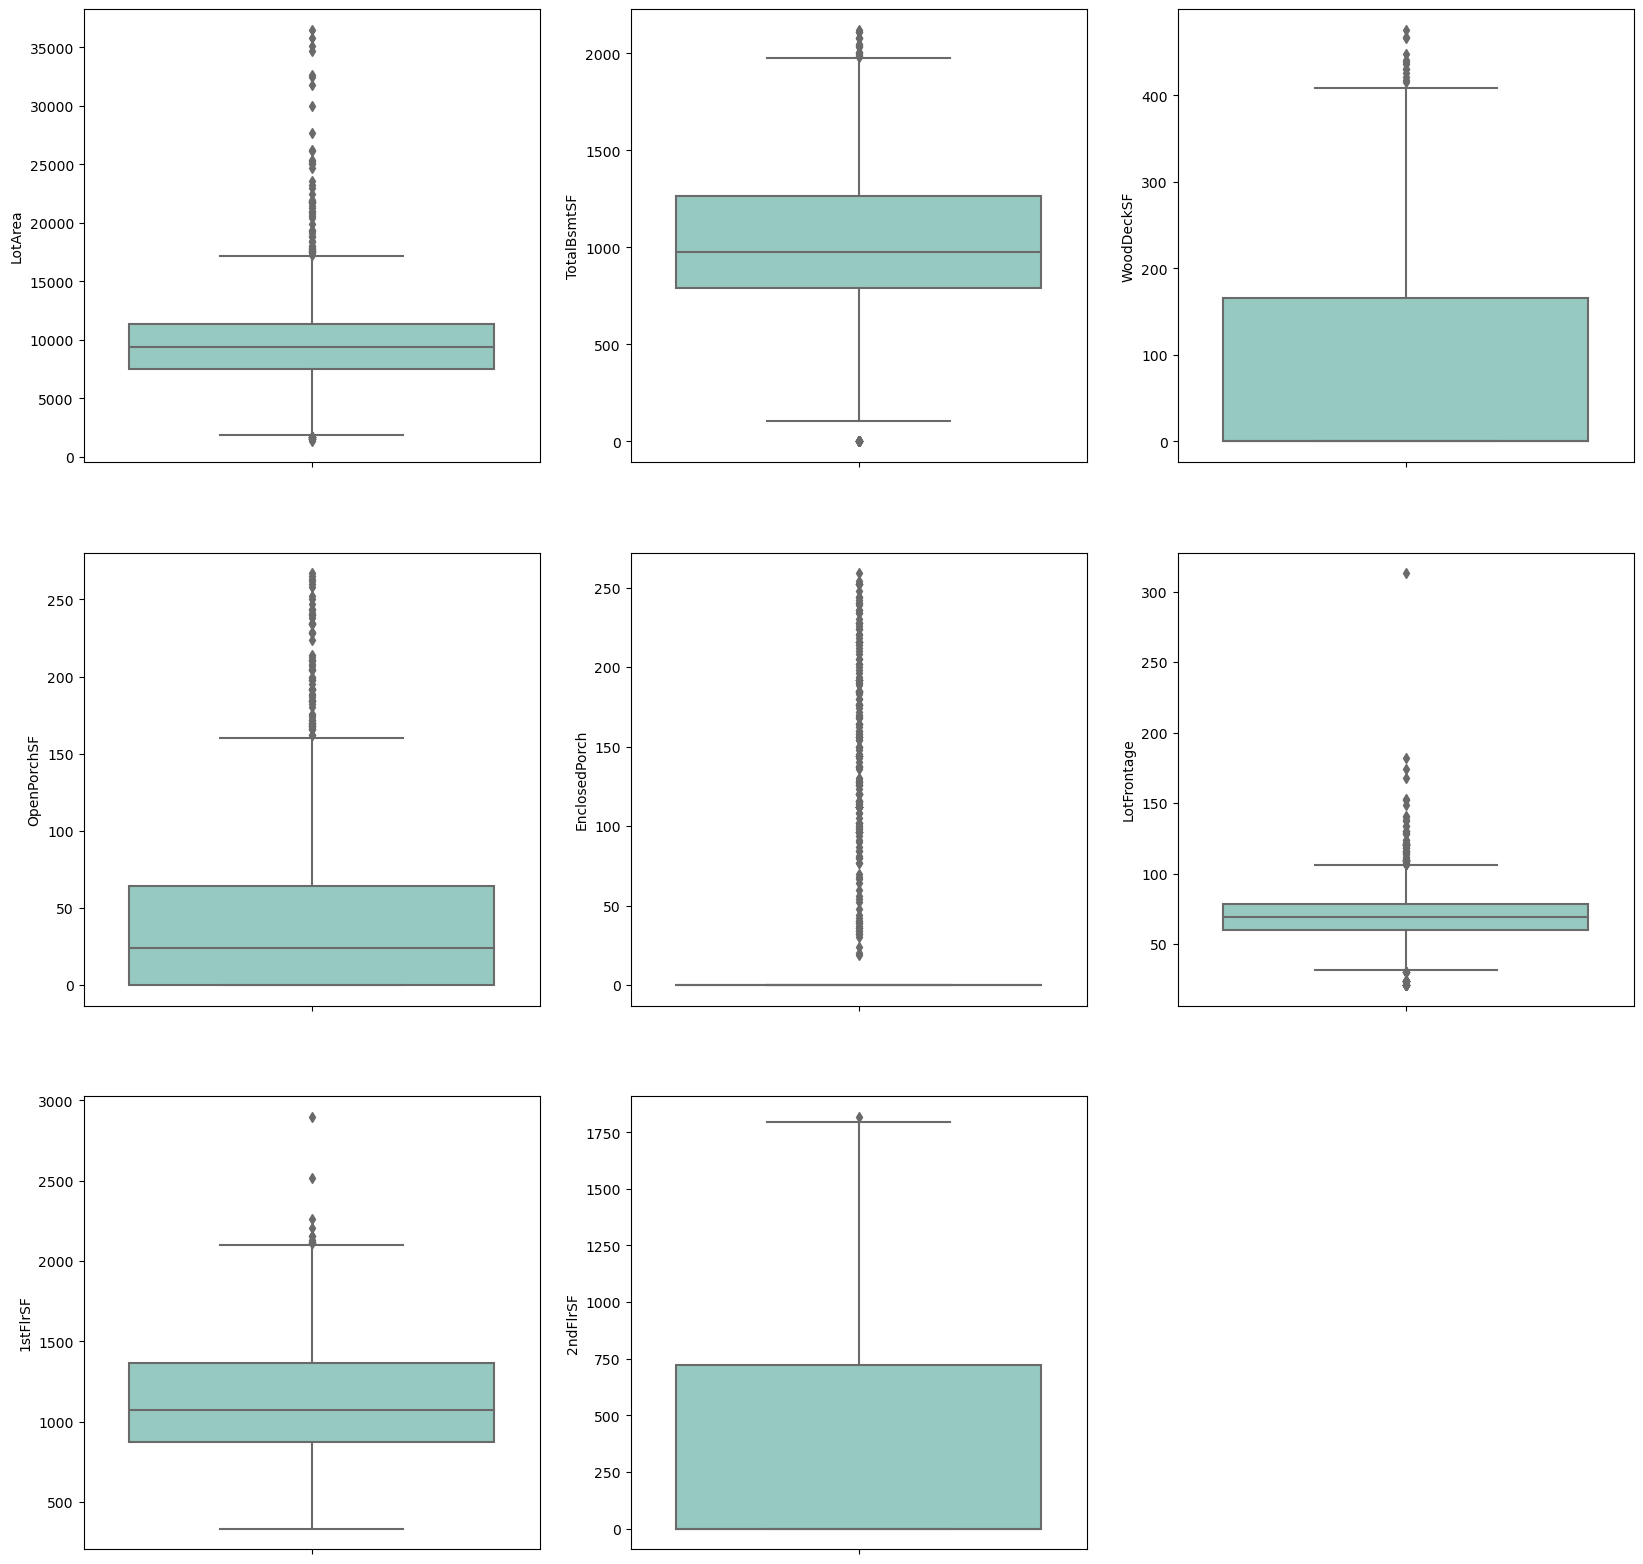

In [560]:
# checking for the outliers in all the numeric columns
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = housingdf)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF",palette='Set3', data = housingdf)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housingdf)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housingdf)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = housingdf)
plt.subplot(3,3,6)
sns.boxplot(y = 'LotFrontage', palette='Set3', data = housingdf)
plt.subplot(3,3,7)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = housingdf)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = housingdf)

plt.show()


In [561]:
# Determining the percentage of data retained after removing the outliers
num_data = round(100*(len(housingdf)/1460),2)
print(num_data)

94.93


### Data Visualization

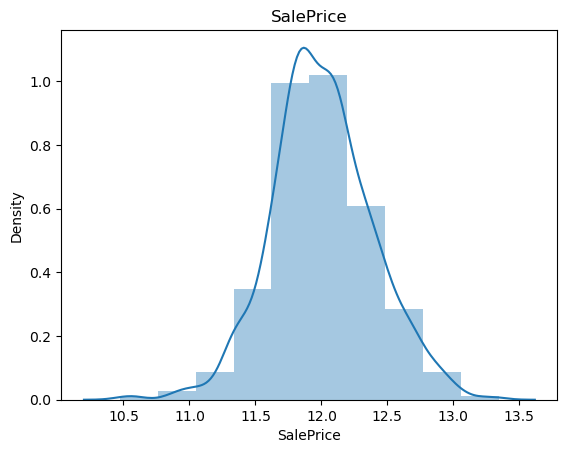

In [562]:
# transform the sales price
housingdf['SalePrice'] = np.log1p(housingdf['SalePrice'])

plt.title('SalePrice')
sns.distplot(housingdf['SalePrice'], bins=10)
plt.show()

In [563]:
# Check the numerical values using pairplots

houseNum1=housingdf[['LotFrontage','LotArea','MSSubClass','OverallQual', 'OverallCond','TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea',
                  'SalePrice']]

houseNum2=housingdf[['BsmtFullBath','FullBath', 'HalfBath','BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars','GarageArea', 'WoodDeckSF',               
'OpenPorchSF','SalePrice']]


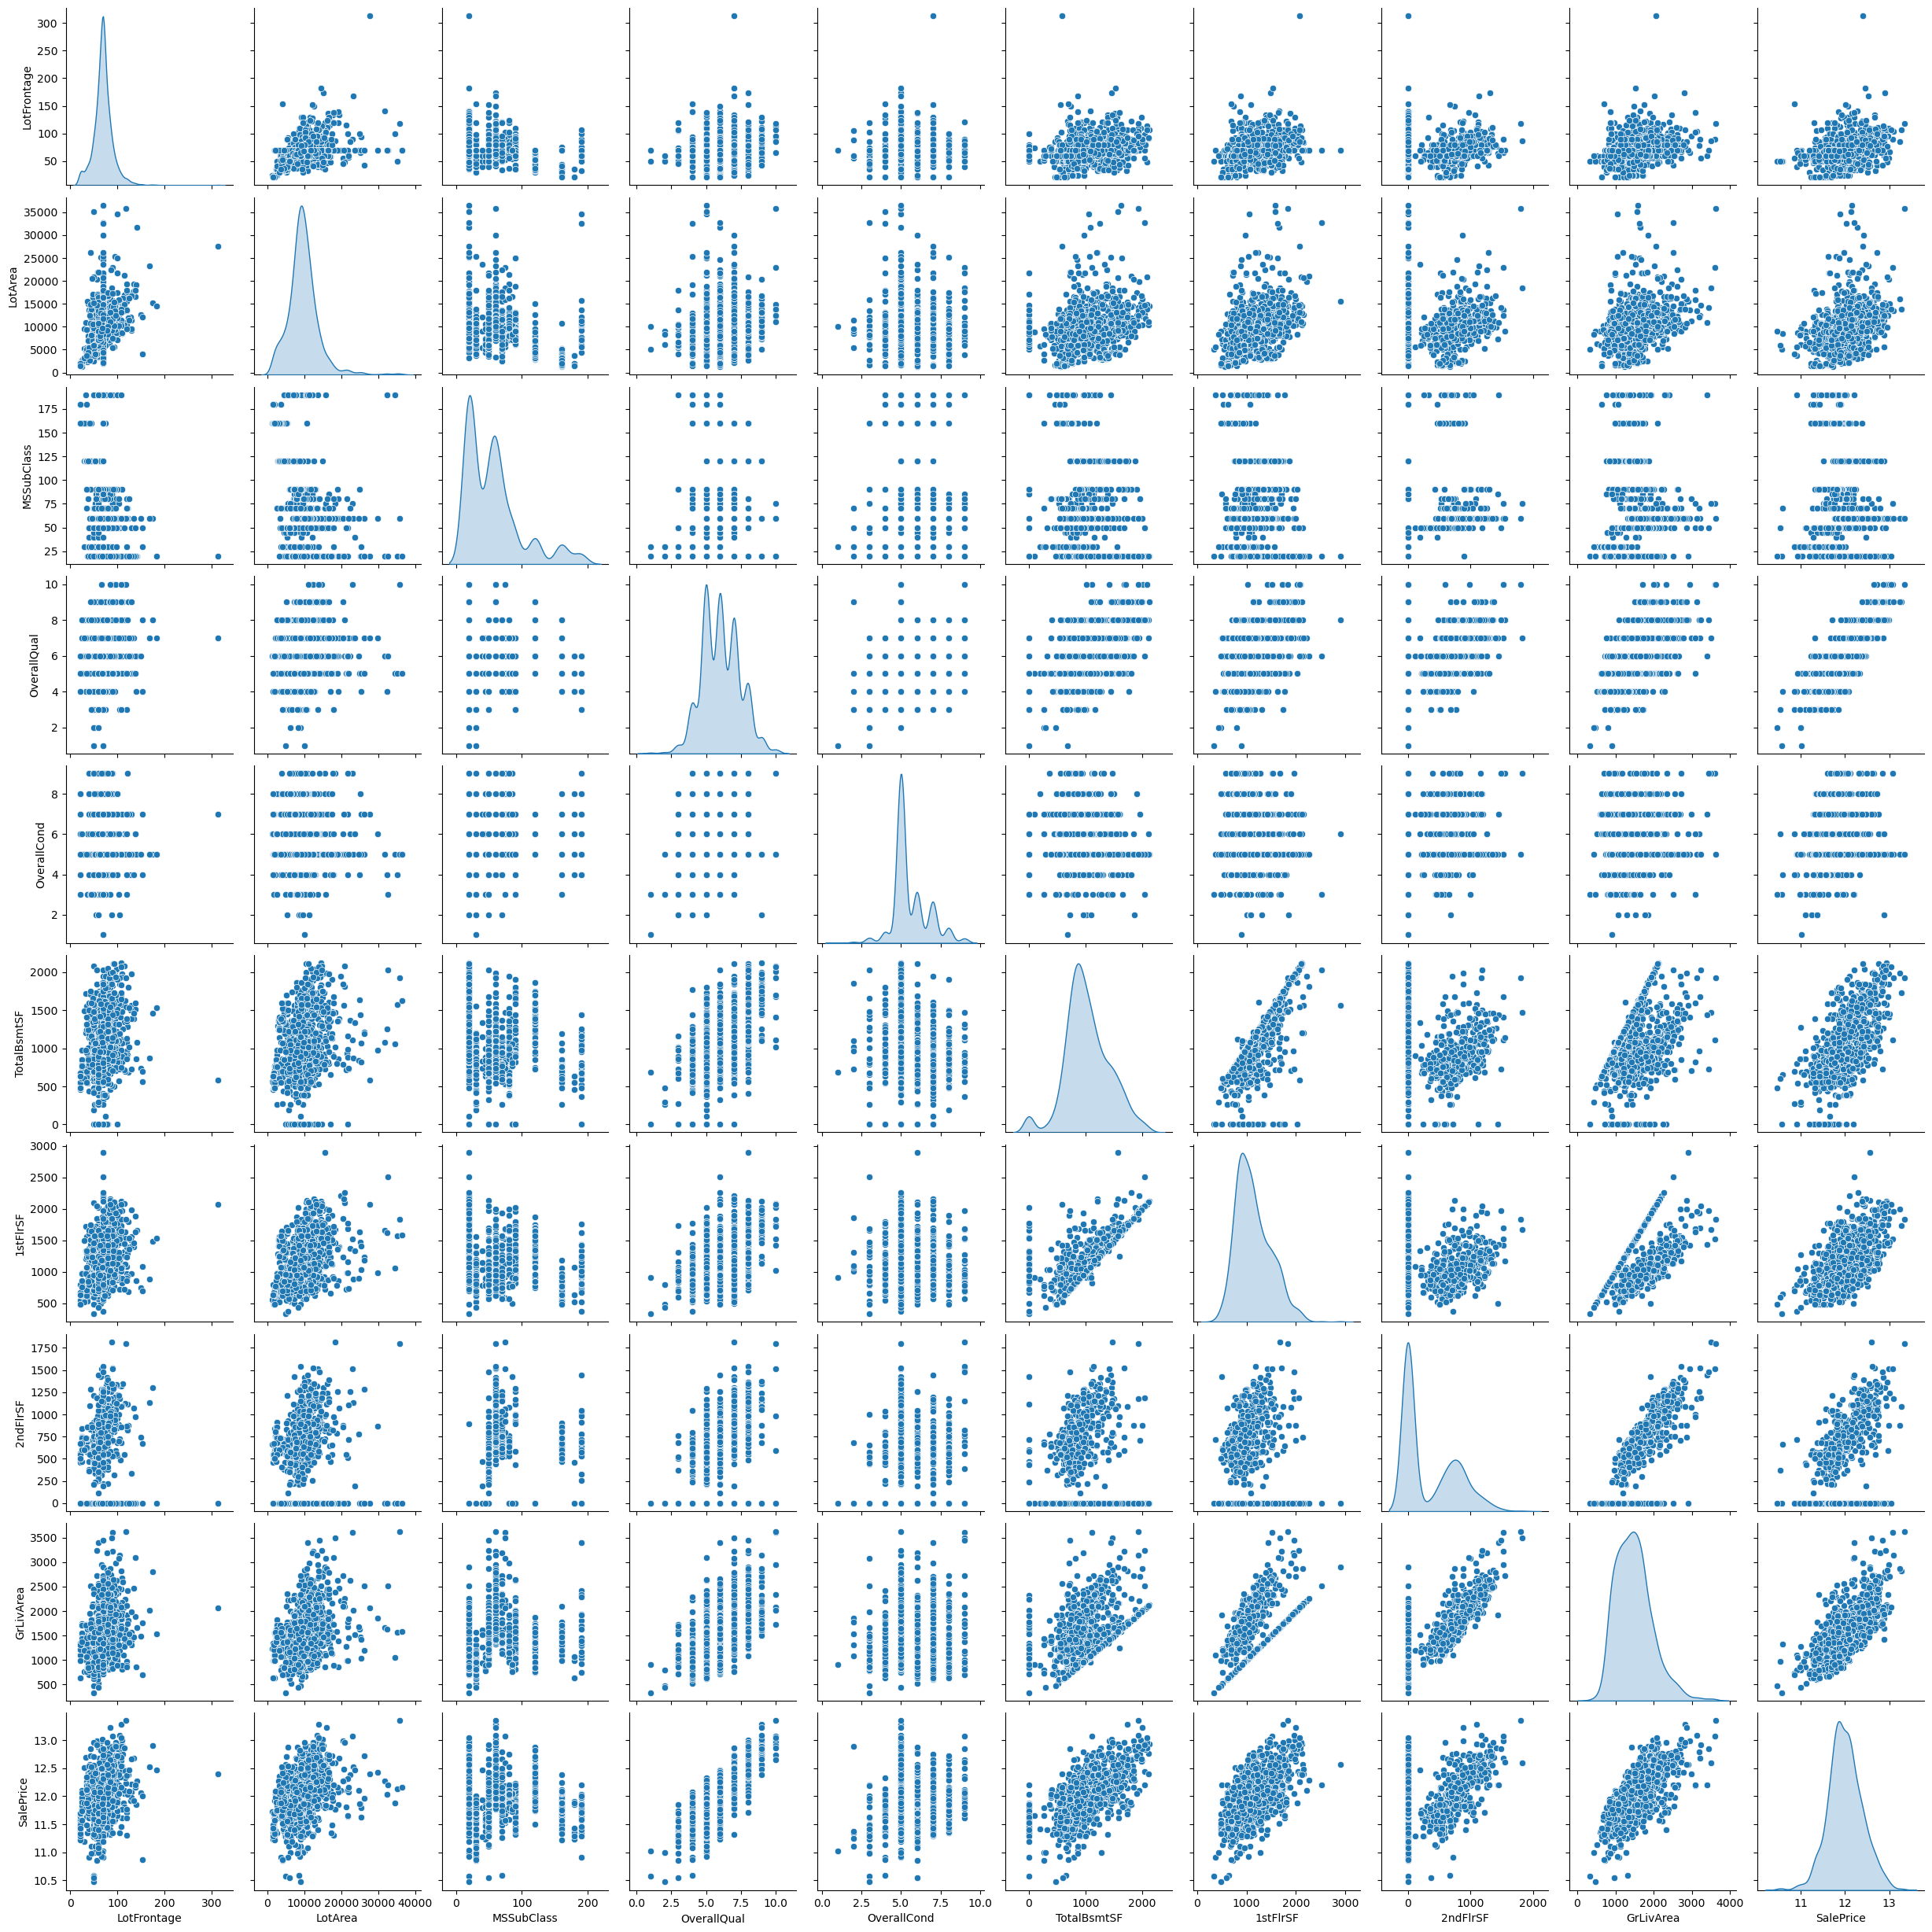

In [564]:
sns.pairplot(houseNum1, diag_kind='kde')
plt.show()

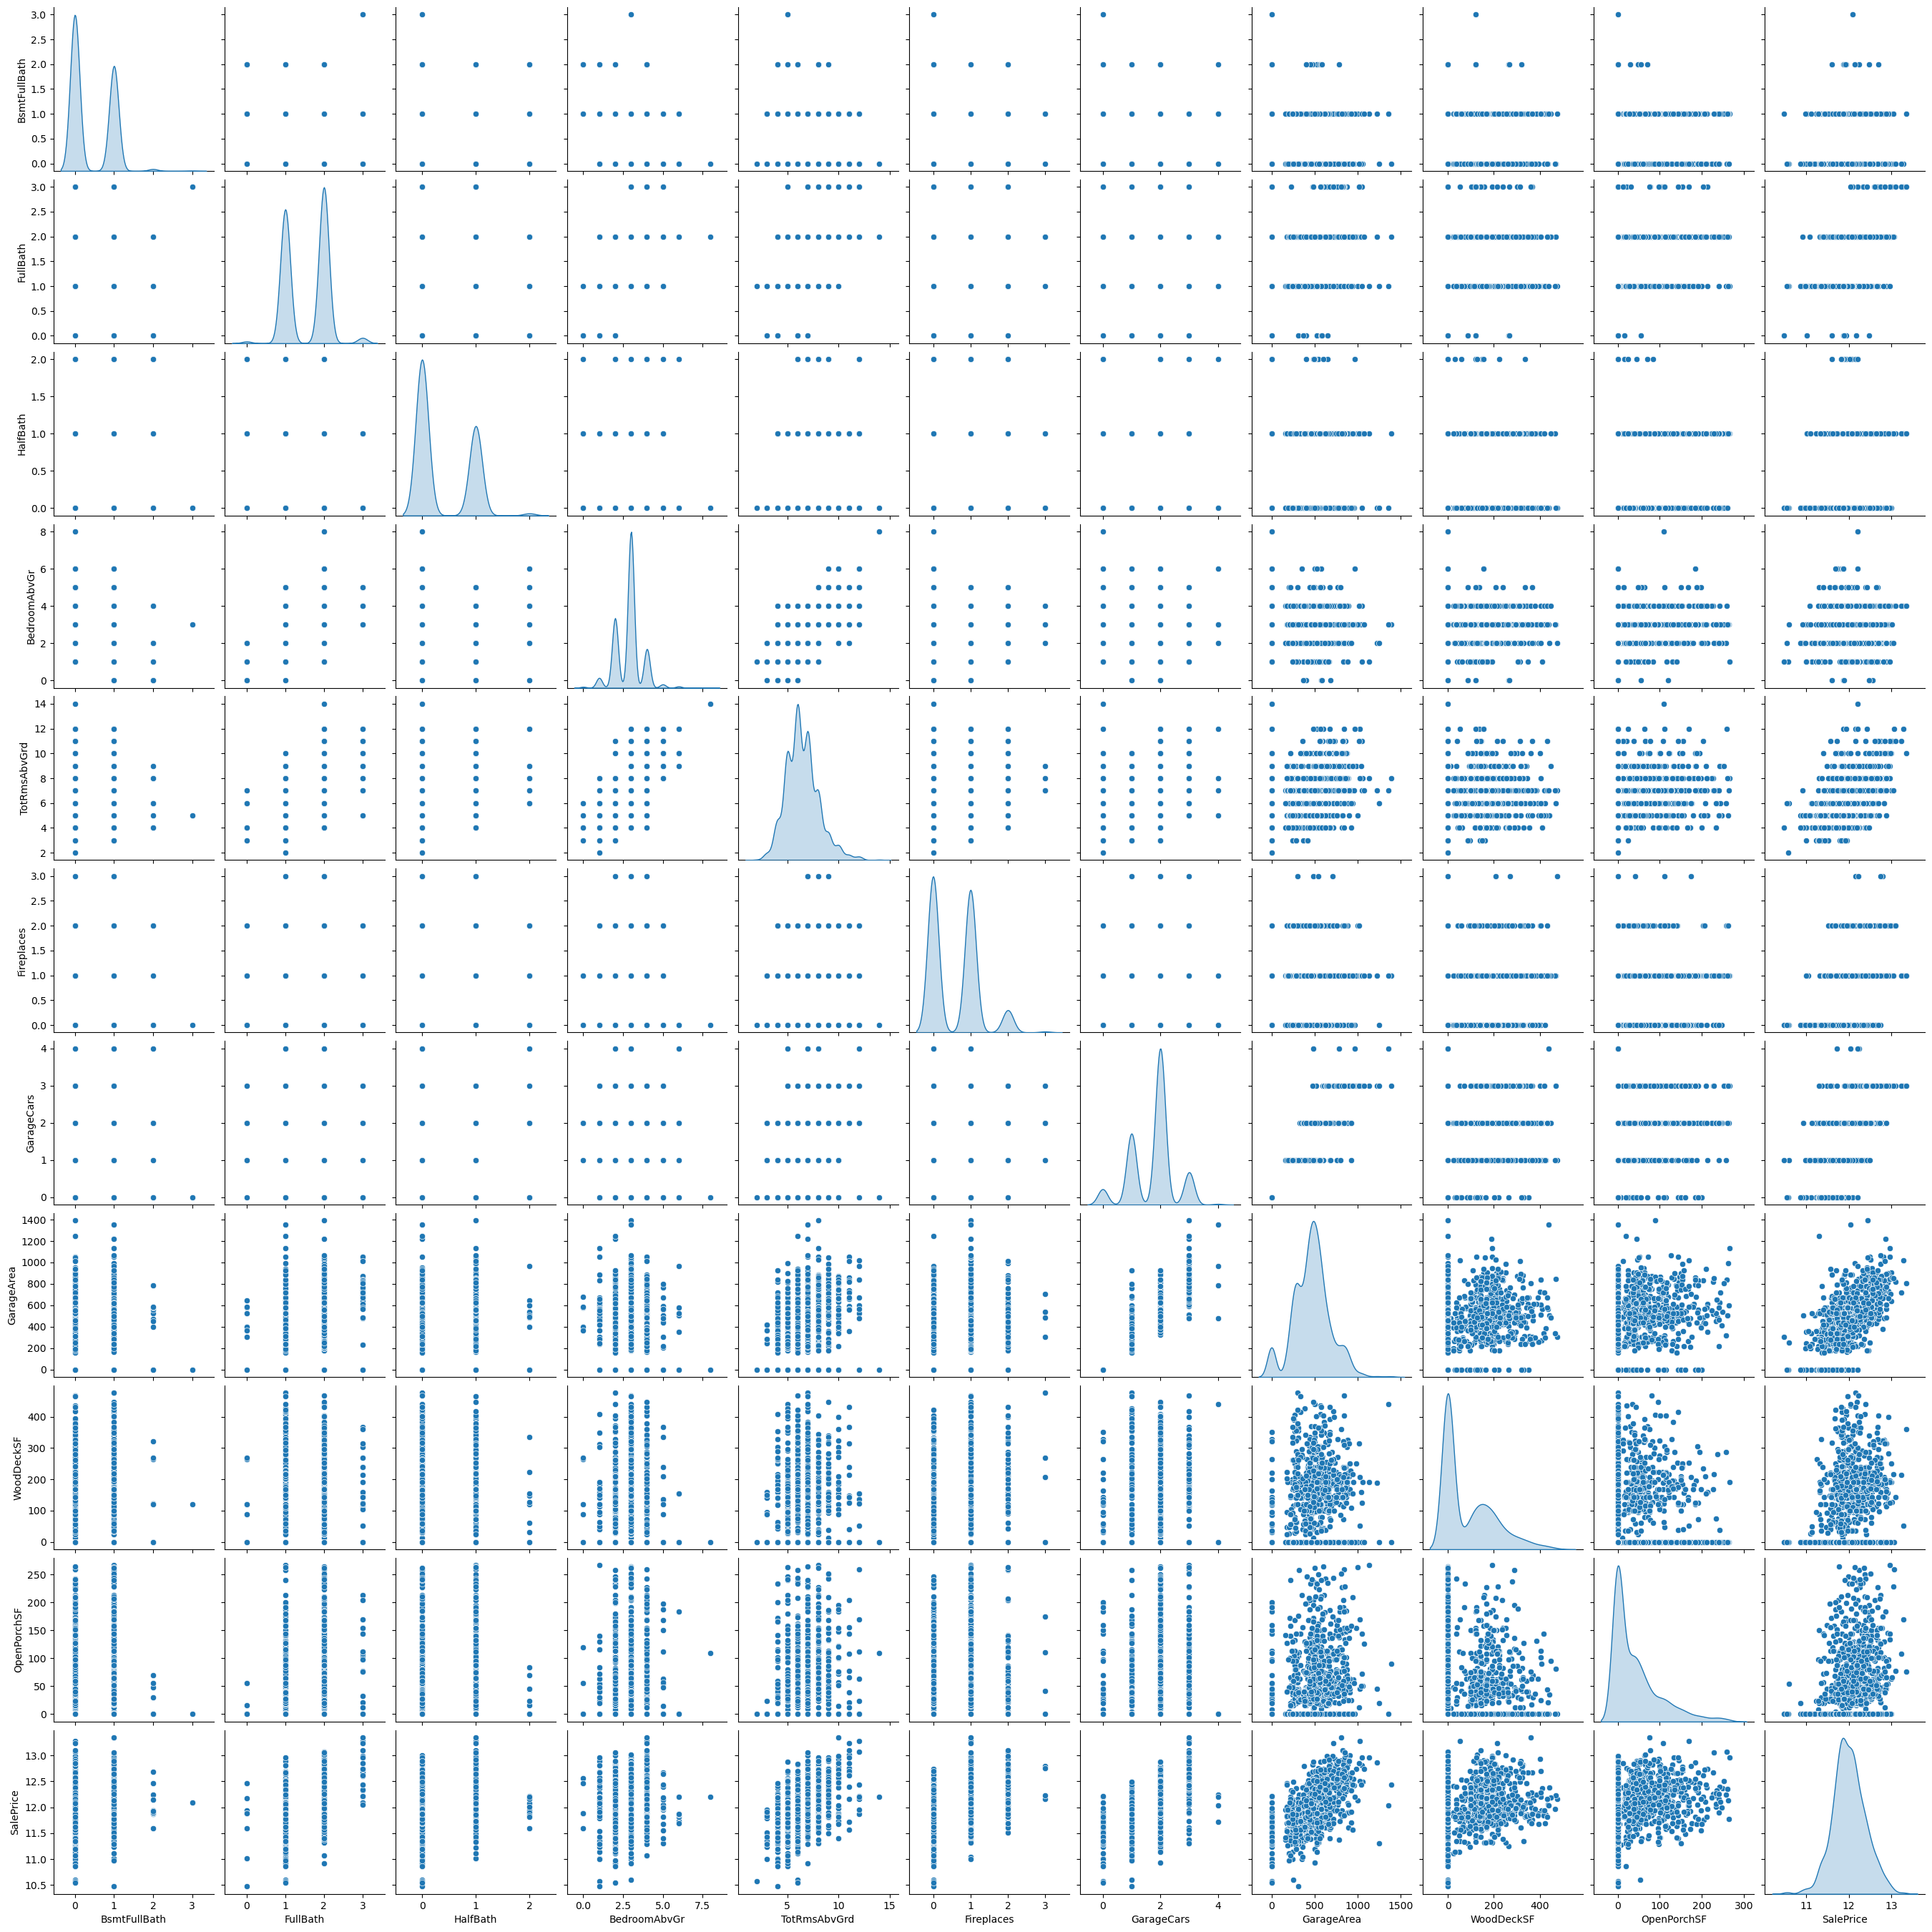

In [565]:
sns.pairplot(houseNum2, diag_kind='kde')
plt.show()

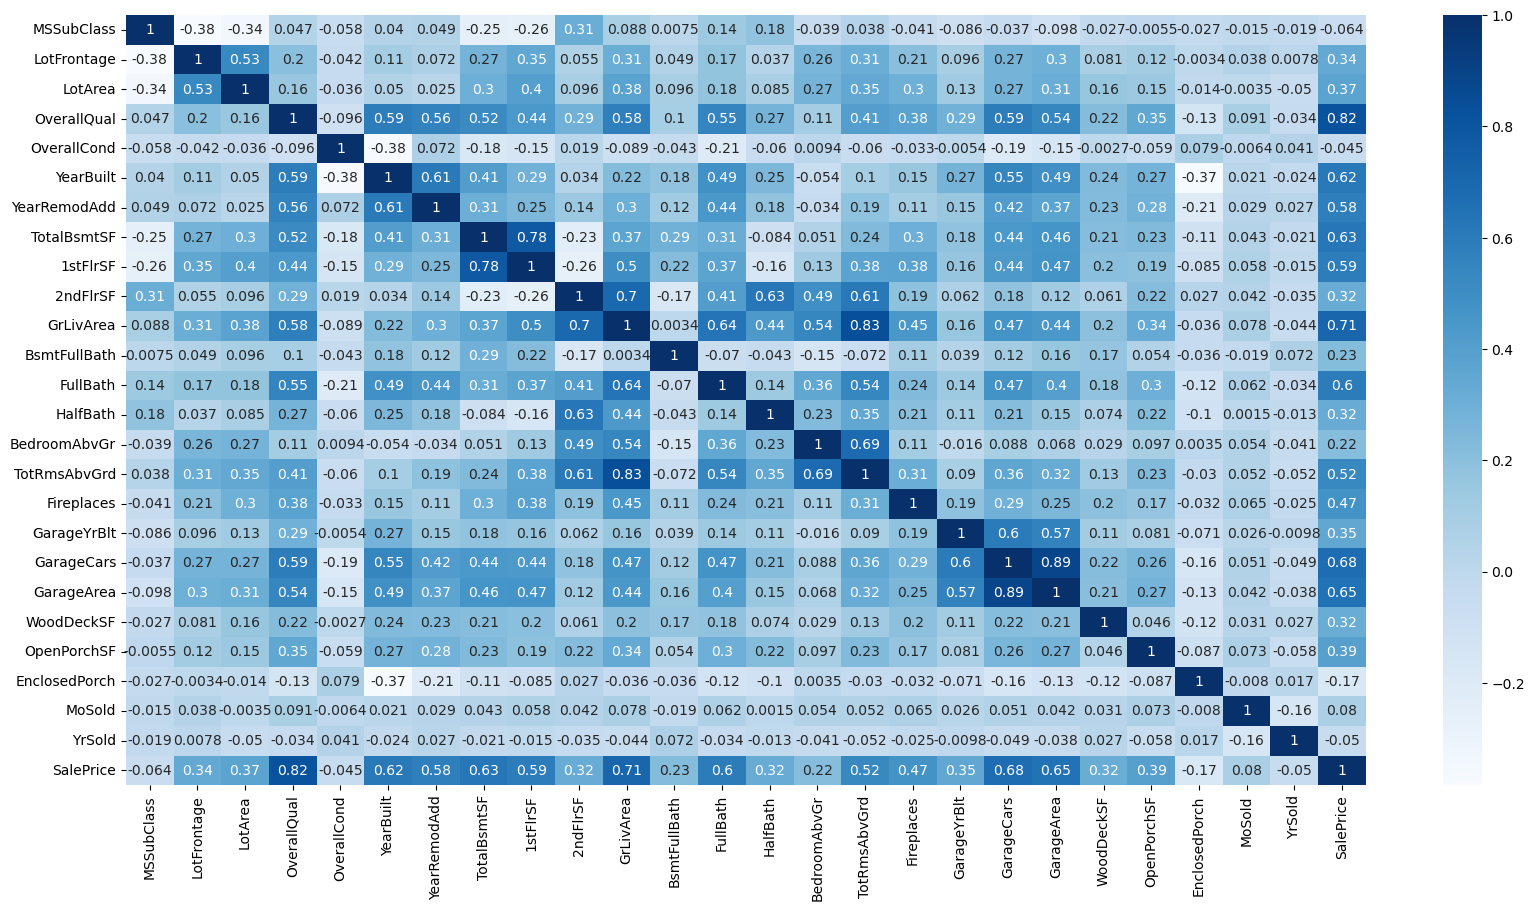

In [566]:
plt.figure(figsize = (20, 10))
sns.heatmap(housingdf.corr(), annot = True, cmap="Blues")
plt.show()

#### From the above heatmap we can see that the below variables are highly correlated. Therefore can be removed
- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%

In [567]:
# Removing the highly correlated variables

housingdf.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [568]:
housingdf.shape
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1386 non-null   int64  
 1   MSZoning       1386 non-null   object 
 2   LotFrontage    1386 non-null   float64
 3   LotArea        1386 non-null   int64  
 4   LotShape       1386 non-null   object 
 5   LandContour    1386 non-null   object 
 6   LotConfig      1386 non-null   object 
 7   Neighborhood   1386 non-null   object 
 8   Condition1     1386 non-null   object 
 9   BldgType       1386 non-null   object 
 10  HouseStyle     1386 non-null   object 
 11  OverallQual    1386 non-null   int64  
 12  OverallCond    1386 non-null   int64  
 13  YearBuilt      1386 non-null   int64  
 14  YearRemodAdd   1386 non-null   int64  
 15  RoofStyle      1386 non-null   object 
 16  Exterior1st    1386 non-null   object 
 17  Exterior2nd    1386 non-null   object 
 18  MasVnrTy

#### Creating derived column

In [569]:
housingdf[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
4       2000          2000       2000.0    2008
5       1993          1995       1993.0    2009

In [570]:
# Create a new column named IsRemodelled - This column will determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housingdf['IsRemodelled'] = housingdf.apply(checkRemodel, axis=1)
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... WoodDeckSF  OpenPorchSF  \
0      CollgCr       Norm     1Fam  ...          0           61   
1      Veenker      Feedr     1Fam  ...        298            0   
2      CollgCr       Norm     1Fam  ...          0           42   
4      NoRidge       Norm     1Fam  ...        192           84   
5      Mitchel       Norm     1Fam  ...         40           30   

   EnclosedPorch     Fence  MoSold YrSold SaleType SaleCondition  SalePrice  \
0              0  No Fence       2   2008       WD        Normal  12.247699   
1              0  No Fence       5   2007       WD        Normal  12.109016   
2              0  No Fence       9   2008       WD        Normal  12.317171   
4              0  No Fence      12   2008       WD        Normal  12.429220   
5              0     MnPrv      10   2009       WD        Normal  11.870607   

  IsRemodelled  
0            0  
1            0  
2            1  
4            0  
5            1  

[5 rows x 50 columns]

In [571]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def funBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housingdf['BuiltOrRemodelAge'] = housingdf.apply(funBuiltOrRemodelAge, axis=1)
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... OpenPorchSF  EnclosedPorch     Fence  \
0      CollgCr       Norm     1Fam  ...          61              0  No Fence   
1      Veenker      Feedr     1Fam  ...           0              0  No Fence   
2      CollgCr       Norm     1Fam  ...          42              0  No Fence   
4      NoRidge       Norm     1Fam  ...          84              0  No Fence   
5      Mitchel       Norm     1Fam  ...          30              0     MnPrv   

   MoSold  YrSold SaleType SaleCondition  SalePrice IsRemodelled  \
0       2    2008       WD        Normal  12.247699            0   
1       5    2007       WD        Normal  12.109016            0   
2       9    2008       WD        Normal  12.317171            1   
4      12    2008       WD        Normal  12.429220            0   
5      10    2009       WD        Normal  11.870607            1   

  BuiltOrRemodelAge  
0                 5  
1                31  
2                 6  
4                 8  
5                14  

[5 rows x 51 columns]

In [572]:
# Create a new column which would indicate if the Garage is old or new.
# GarageYrBuilt less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def GarageConstructionAge(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housingdf['OldOrNewGarage'] = housingdf['GarageYrBlt'].apply(GarageConstructionAge)
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... EnclosedPorch     Fence  MoSold  \
0      CollgCr       Norm     1Fam  ...             0  No Fence       2   
1      Veenker      Feedr     1Fam  ...             0  No Fence       5   
2      CollgCr       Norm     1Fam  ...             0  No Fence       9   
4      NoRidge       Norm     1Fam  ...             0  No Fence      12   
5      Mitchel       Norm     1Fam  ...             0     MnPrv      10   

   YrSold  SaleType SaleCondition  SalePrice IsRemodelled BuiltOrRemodelAge  \
0    2008        WD        Normal  12.247699            0                 5   
1    2007        WD        Normal  12.109016            0                31   
2    2008        WD        Normal  12.317171            1                 6   
4    2008        WD        Normal  12.429220            0                 8   
5    2009        WD        Normal  11.870607            1                14   

  OldOrNewGarage  
0              1  
1              0  
2              1  
4              1  
5              0  

[5 rows x 52 columns]

In [573]:
# Since we have created new feature variables from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# we will use the derived columns for further analysis

housingdf.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [574]:
housingdf.shape

(1386, 48)

In [575]:
housingdf[['ExterQual','BsmtQual','BsmtCond',
            'HeatingQC',  'KitchenQual','GarageFinish',
             'ExterCond','LotShape']].head()

ExterQual BsmtQual BsmtCond HeatingQC KitchenQual GarageFinish ExterCond  \
0        Gd       Gd       TA        Ex          Gd          RFn        TA   
1        TA       Gd       TA        Ex          TA          RFn        TA   
2        Gd       Gd       TA        Ex          Gd          RFn        TA   
4        Gd       Gd       TA        Ex          Gd          RFn        TA   
5        TA       Gd       TA        Ex          TA          Unf        TA   

  LotShape  
0      Reg  
1      Reg  
2      IR1  
4      IR1  
5      IR1

##### Changing the type to category and labeling the values:

In [576]:
housingdf['ExterQual'] = housingdf['ExterQual'].astype('category')
housingdf['BsmtQual'] = housingdf['BsmtQual'].astype('category')
housingdf['BsmtCond'] = housingdf['BsmtCond'].astype('category')
housingdf['HeatingQC'] = housingdf['HeatingQC'].astype('category')
housingdf['KitchenQual'] = housingdf['KitchenQual'].astype('category')
housingdf['GarageFinish'] = housingdf['GarageFinish'].astype('category')
housingdf['ExterCond'] = housingdf['ExterCond'].astype('category')
housingdf['LotShape'] = housingdf['LotShape'].astype('category')
housingdf['Neighborhood'] = housingdf['Neighborhood'].astype('category')

housingdf['ExterQual'] = housingdf.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housingdf['BsmtQual'] = housingdf.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housingdf['BsmtCond'] = housingdf.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housingdf['HeatingQC'] = housingdf.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housingdf['KitchenQual'] = housingdf.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housingdf['FireplaceQu'] = housingdf['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
housingdf['GarageFinish'] = housingdf.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
housingdf['ExterCond'] = housingdf.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housingdf['LotShape'] = housingdf.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housingdf['Fence'] = housingdf['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0 })

In [577]:
#Changing to numerical column
housingdf[['ExterQual','BsmtQual','BsmtCond',
            'HeatingQC',  'KitchenQual','GarageFinish',
             'ExterCond','LotShape']].head()

ExterQual BsmtQual BsmtCond HeatingQC KitchenQual GarageFinish ExterCond  \
0         3        4        3         4           3            2         2   
1         2        4        3         4           2            2         2   
2         3        4        3         4           3            2         2   
4         3        4        3         4           3            2         2   
5         2        4        3         4           2            1         2   

  LotShape  
0        3  
1        3  
2        0  
4        0  
5        0

In [578]:
# categorical columns
housingdf[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Neighborhood',
            'GarageType','SaleType','SaleCondition']].head()

MSZoning LandContour LotConfig Condition1 BldgType HouseStyle RoofStyle  \
0       RL         Lvl    Inside       Norm     1Fam     2Story     Gable   
1       RL         Lvl       FR2      Feedr     1Fam     1Story     Gable   
2       RL         Lvl    Inside       Norm     1Fam     2Story     Gable   
4       RL         Lvl       FR2       Norm     1Fam     2Story     Gable   
5       RL         Lvl    Inside       Norm     1Fam     1.5Fin     Gable   

  Exterior1st Exterior2nd MasVnrType Foundation Neighborhood GarageType  \
0     VinylSd     VinylSd    BrkFace      PConc      CollgCr     Attchd   
1     MetalSd     MetalSd       None     CBlock      Veenker     Attchd   
2     VinylSd     VinylSd    BrkFace      PConc      CollgCr     Attchd   
4     VinylSd     VinylSd    BrkFace      PConc      NoRidge     Attchd   
5     VinylSd     VinylSd       None       Wood      Mitchel     Attchd   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
4       WD        Normal  
5       WD        Normal

In [579]:
#neighbpurhood column
housingdf["Neighborhood"].value_counts()
housingdf.shape

(1386, 48)

#### Creating Dummy Variables

In [580]:
## Creating dummy variables
houseDummy = pd.get_dummies(housingdf[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood']],
                           drop_first=True)

In [581]:
houseNew = pd.concat([housingdf, houseDummy], axis='columns')

In [582]:
print(houseNew.shape)
# dropping the actual variables after getting the dummys
houseNew = houseNew.drop(['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood'], axis="columns")
print(houseNew.shape)

(1386, 163)
(1386, 148)


In [583]:
houseNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(23), uint8(115)
memory usage: 449.6 KB


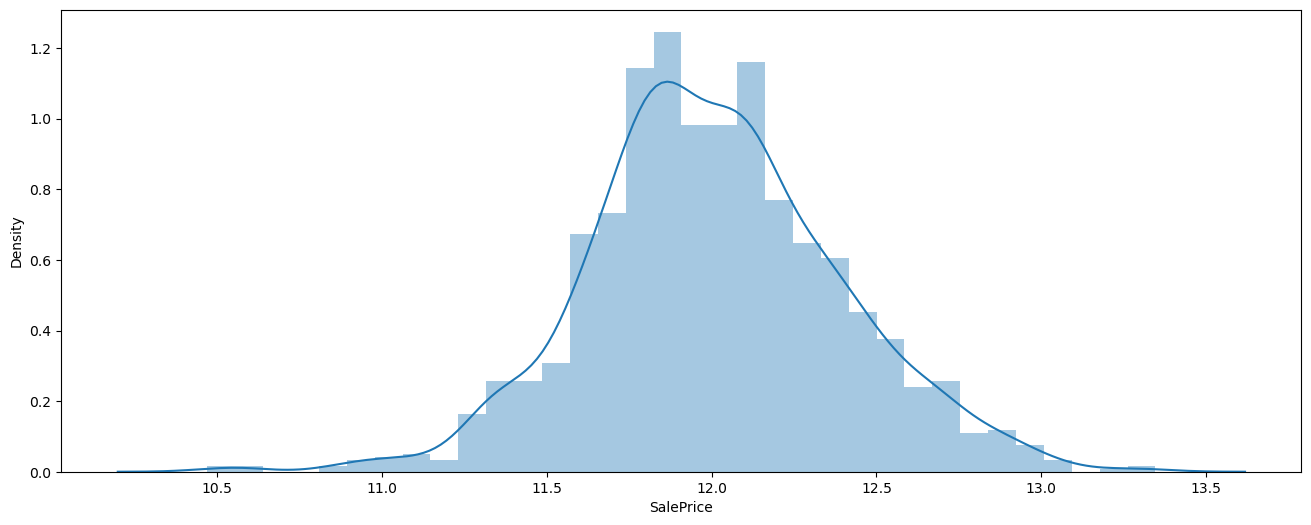

In [584]:
#lets plot the distribution plot of sales price
plt.figure(figsize=(16,6))
sns.distplot(houseNew.SalePrice)
plt.show()

## Creating Train and Test Dataset

In [585]:
house_train, house_test = train_test_split(houseNew, train_size=0.7,test_size = 0.3, random_state=100)
print(house_train.shape)
print(house_train.info())
print(house_test.shape)
print(house_test.info())

(970, 148)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 952 to 835
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(23), uint8(115)
memory usage: 315.2 KB
None
(416, 148)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 684 to 497
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(23), uint8(115)
memory usage: 136.1 KB
None


In [586]:
houseNew[['MSSubClass','LotArea','OverallQual','OverallCond',
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]]

MSSubClass  LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  \
0             60     8450            7            5          856       856   
1             20     9600            6            8         1262      1262   
2             60    11250            7            5          920       920   
4             60    14260            8            5         1145      1145   
5             50    14115            5            5          796       796   
...          ...      ...          ...          ...          ...       ...   
1454          20     7500            7            5         1221      1221   
1455          60     7917            6            5          953       953   
1456          20    13175            6            6         1542      2073   
1457          70     9042            7            9         1152      1188   
1458          20     9717            5            6         1078      1078   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0          854       1710             1         2         1             3   
1            0       1262             0         2         0             3   
2          866       1786             1         2         1             3   
4         1053       2198             1         2         1             4   
5          566       1362             1         1         1             1   
...        ...        ...           ...       ...       ...           ...   
1454         0       1221             1         2         0             2   
1455       694       1647             0         2         1             3   
1456         0       2073             1         2         0             3   
1457      1152       2340             0         2         0             4   
1458         0       1078             1         1         0             2   

      Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  
0              0           2           0           61              0  
1              1           2         298            0              0  
2              1           2           0           42              0  
4              1           3         192           84              0  
5              0           2          40           30              0  
...          ...         ...         ...          ...            ...  
1454           0           2           0          113              0  
1455           1           2           0           40              0  
1456           2           2         349            0              0  
1457           2           1           0           60              0  
1458           0           1         366            0            112  

[1386 rows x 17 columns]

### Scaling the Train Dataset

In [587]:
num_col =['MSSubClass','LotArea','OverallQual','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
house_train[num_col] = scaler.fit_transform(house_train[num_col])
house_test[num_col] = scaler.transform(house_test[num_col])

<Axes: xlabel='SalePrice', ylabel='Density'>

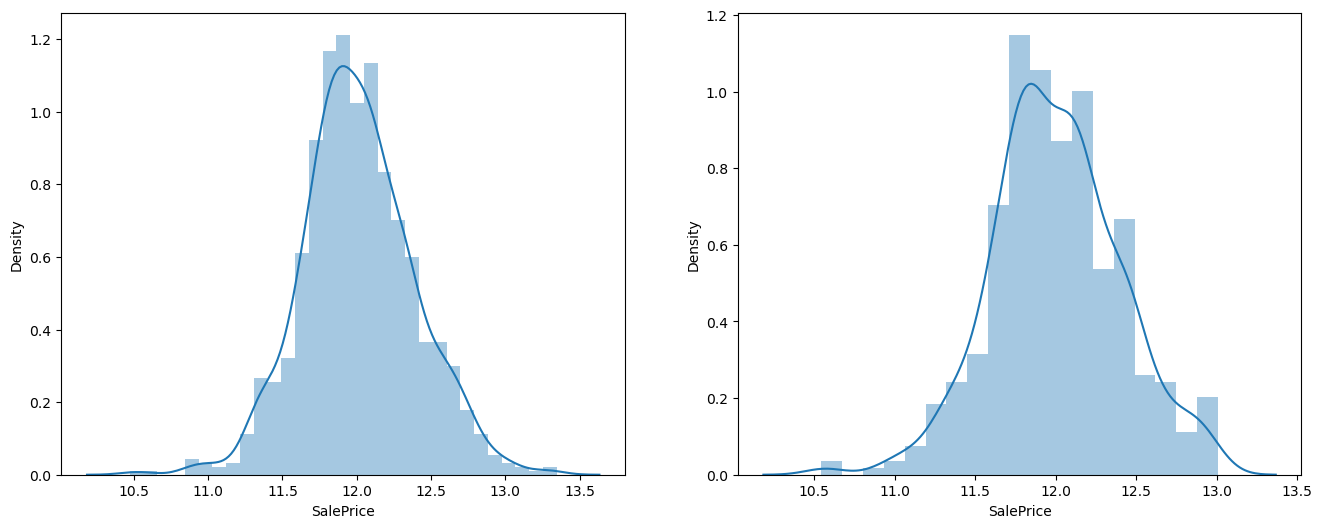

In [588]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(house_train.SalePrice)
plt.subplot(122)
sns.distplot(house_test.SalePrice)

In [589]:
## Fixing Target Variables
X_train = house_train
y_train = house_train.pop('SalePrice')

X_test = house_test
y_test = house_test.pop('SalePrice')

### Linear Regression
### RFE

In [590]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm)            
rfe = rfe.fit(X_train, y_train)


In [591]:
y_LR_Pred = lm.predict(X_train)
print(r2_score(y_train, y_LR_Pred))
RSS = np.sum(np.square(y_train-y_LR_Pred))
print(RSS)
MSE = mean_squared_error(y_train, y_LR_Pred)
print(MSE)
#RMSE
print(MSE*0.5)

0.9342888611507667
9.133068147558465
0.009415534172740686
0.004707767086370343


Text(0.5, 0, 'Errors')

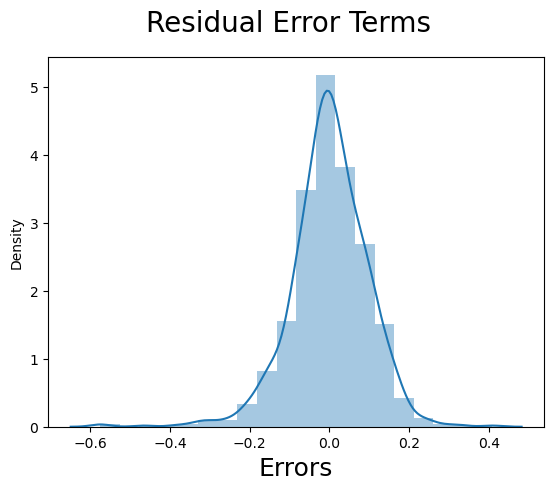

In [592]:
y_LR_Pred = lm.predict(X_train)
res = y_train-y_LR_Pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

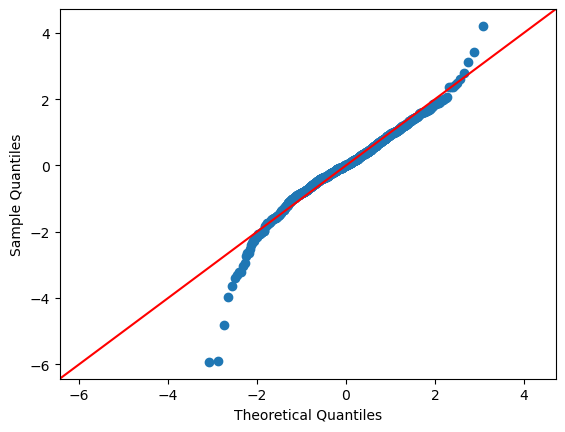

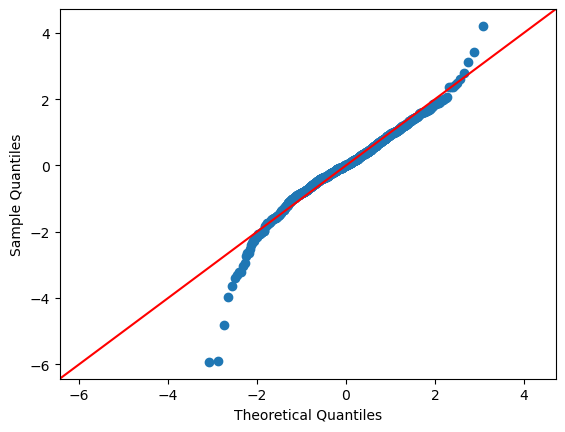

In [593]:
sm.qqplot(res, fit=True,line='45')

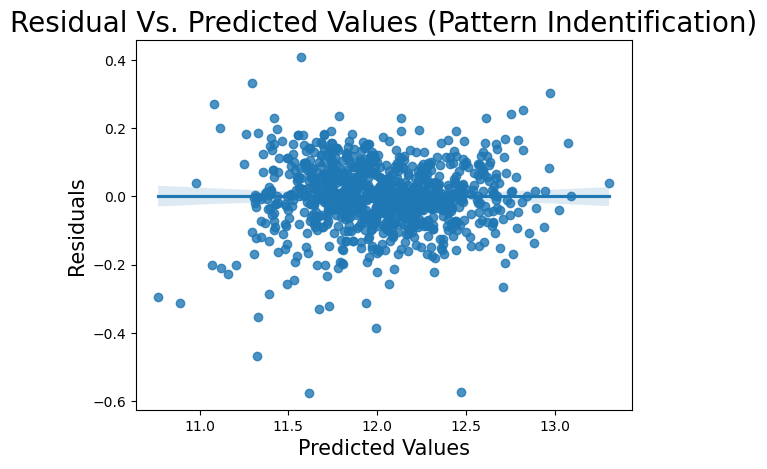

In [594]:
sns.regplot(x=y_LR_Pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [595]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the features selected using RFE to a dataframe and view them

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df

Variable  rfe_support  rfe_ranking
0            OverallQual         True            1
1            OverallCond         True            1
2            TotalBsmtSF         True            1
3              GrLivArea         True            1
4           BsmtFullBath         True            1
..                   ...          ...          ...
68    Neighborhood_NAmes         True            1
69  Neighborhood_NridgHt         True            1
70  Neighborhood_OldTown         True            1
71    Neighborhood_SWISU         True            1
72  Neighborhood_Veenker         True            1

[73 rows x 3 columns]

In [596]:
# Assign the columns to X_train_rfe
X_train_rfe = X_train[col]

In [597]:
# Associate the new columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

### Model building and Evaluation

### Ridge Regression Model

In [598]:
# list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [599]:
# the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 3.0}


In [600]:
#fit the data to ridge
ridge = Ridge(alpha=3.0)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 9.10185609e-02  5.14462426e-02  5.73615170e-02  1.34187580e-01
  3.56990348e-02  3.77456004e-02  4.33901381e-02  1.41973123e-01
  3.99987530e-02  1.04124631e-01  1.82256775e-02 -1.75410566e-02
  2.36361703e-02  7.53044238e-02  3.50491337e-02  6.81576305e-02
  4.45593340e-02 -6.24640269e-02 -7.57706754e-02 -2.90694538e-02
 -6.99107856e-02  2.29661859e-02 -4.93066043e-02 -2.60387771e-02
 -4.22340098e-02 -1.44488397e-02 -9.00006116e-02  7.95663227e-02
 -1.23395008e-04  1.87526328e-03  1.28807163e-02 -2.82547239e-02
 -4.88070142e-02  2.28691754e-02  3.44699298e-02 -1.23395008e-04
  5.81291149e-02  4.01801229e-02  1.64911286e-02  5.58644179e-02
  3.37241382e-02  4.34652297e-02  5.92518189e-02  6.92569504e-02
  2.79247568e-02  8.18218876e-02  7.13209521e-03 -2.73847102e-02
  4.45824102e-02  1.24336617e-02  6.65074689e-02 -6.37459538e-03
  1.06451686e-02 -2.32316995e-02  6.03237630e-02  3.04516124e-02
 -1.39934193e-03  5.05774658e-02  5.58575121e-02  3.60166850e-02
  5.60294333e-02  5.05774

In [601]:
# display the mean scores
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
14         3.0         -0.079760        -0.086469                1
15         4.0         -0.080220        -0.086477                2
16         5.0         -0.080598        -0.086506                3
13         2.0         -0.079159        -0.086531                4
17         6.0         -0.080930        -0.086559                5
18         7.0         -0.081230        -0.086625                6
12         1.0         -0.078287        -0.086642                7
11         0.9         -0.078174        -0.086649                8
10         0.8         -0.078053        -0.086653                9
9          0.7         -0.077928        -0.086672               10
19         8.0         -0.081509        -0.086697               11
8          0.6         -0.077800        -0.086714               12
7          0.5         -0.077664        -0.086760               13
20         9.0         -0.081768        -0.086773               14
6          0.4         -0.077517        -0.086823               15
21        10.0         -0.082007        -0.086843               16
5          0.3         -0.077368        -0.086900               17
4          0.2         -0.077213        -0.087004               18
3          0.1         -0.077066        -0.087158               19
2         0.01         -0.076947        -0.087412               20
1        0.001         -0.076936        -0.087442               21
0       0.0001         -0.076935        -0.087446               22
22          20         -0.083916        -0.087658               23
23          50         -0.086877        -0.089589               24
24         100         -0.089545        -0.091496               25
25         500         -0.105370        -0.106340               26

In [602]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9185109053124259
r2_test:
0.8866037672251994
RSS_train:
11.326016686030144
RSS_test:
7.496127158746314
MSE_train:
0.011676305861886746
MSE_test:
0.018019536439294024


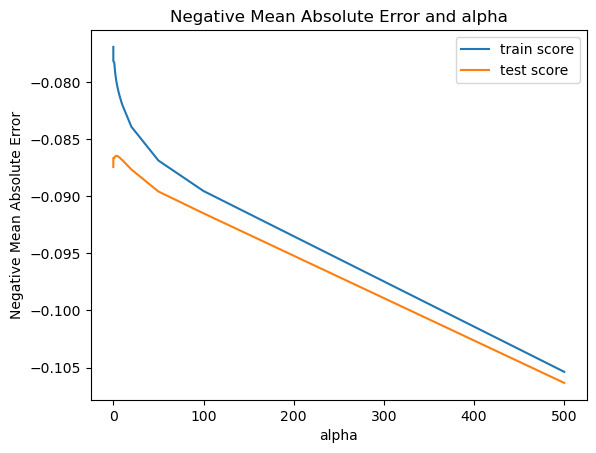

In [603]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [604]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0            OverallQual       0.0910
1            OverallCond       0.0514
2            TotalBsmtSF       0.0574
3              GrLivArea       0.1342
4           BsmtFullBath       0.0357
..                   ...          ...
68    Neighborhood_NAmes      -0.0289
69  Neighborhood_NridgHt       0.0631
70  Neighborhood_OldTown      -0.1003
71    Neighborhood_SWISU      -0.0739
72  Neighborhood_Veenker       0.0479

[73 rows x 2 columns]

In [605]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
0            OverallQual  11.641460
8            MSZoning_RH   0.141973
4           BsmtFullBath   0.134188
10           MSZoning_RM   0.104125
1            OverallCond   0.091019
46      Foundation_Stone   0.081822
28    Exterior1st_CBlock   0.079566
14       Condition1_PosN   0.075304
65  Neighborhood_Edwards   0.071754
44     Foundation_CBlock   0.069257

### Lasso Regression

In [606]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9092918148352487
0.8831181450768383


In [607]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [608]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [609]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [610]:
lasso.coef_

array([ 0.08771125,  0.05021673,  0.05720437,  0.13515449,  0.03553157,
        0.03642765,  0.04467791,  0.26536512,  0.15901421,  0.21848793,
        0.12938561, -0.00271455,  0.02940298,  0.08160474,  0.03962545,
        0.07940041,  0.06141581, -0.07096932, -0.08085634, -0.02879597,
       -0.0746725 ,  0.02726123, -0.07331524, -0.04607234, -0.06519066,
       -0.02480732, -0.19462335,  0.08456383,  0.        , -0.        ,
        0.        , -0.01633899, -0.05342018,  0.02355494,  0.0405018 ,
        0.        ,  0.07331797,  0.04298303,  0.01447082,  0.05974311,
        0.04684837,  0.04597657,  0.06354526,  0.07643972,  0.02828684,
        0.08061134,  0.01103882, -0.00742422,  0.05858526,  0.02612621,
        0.08180331,  0.        ,  0.02535064, -0.00688793,  0.09009734,
        0.01720075,  0.00808565,  0.04800978,  0.07677323,  0.04073915,
        0.0539006 ,  0.04873395, -0.        , -0.01548471,  0.07537655,
       -0.06858879, -0.04909302, -0.11164836, -0.03122753,  0.06

In [611]:
#printing RSS, MSE values for test and train sets in Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric3.append(mse_test_lr)

r2_train:
0.9204005511057292
r2_test:
0.8882878367674351
RSS_train:
11.063378355494079
RSS_test:
7.384800714085307
MSE_train:
0.011405544696385649
MSE_test:
0.017751924793474295


In [612]:
cv_result_lsso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.017920      0.005946         0.006534        0.003548       0.0001   
1       0.006934      0.001737         0.000000        0.000000       0.0010   
2       0.006409      0.003205         0.002528        0.003100       0.0100   
3       0.001696      0.003393         0.006234        0.003126       0.1000   
4       0.001404      0.002807         0.006704        0.003571       0.2000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.091814          -0.085682          -0.079478   
1   {'alpha': 0.001}          -0.090739          -0.086235          -0.086425   
2    {'alpha': 0.01}          -0.103610          -0.094861          -0.102904   
3     {'alpha': 0.1}          -0.149410          -0.166984          -0.156827   
4     {'alpha': 0.2}          -0.213879          -0.254138          -0.231422   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.094537  ...        -0.087180        0.005384                1   
1          -0.096514  ...        -0.089194        0.004056                2   
2          -0.105114  ...        -0.100319        0.004415                3   
3          -0.151586  ...        -0.153086        0.008698                4   
4          -0.227088  ...        -0.224774        0.018884                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.076828           -0.079956           -0.080547   
1           -0.083767           -0.086157           -0.086197   
2           -0.098489           -0.101280           -0.098781   
3           -0.151508           -0.152816           -0.153597   
4           -0.221918           -0.223608           -0.226728   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.075767           -0.078877         -0.078395         0.001826  
1           -0.082396           -0.085649         -0.084833         0.001507  
2           -0.096997           -0.100822         -0.099274         0.001579  
3           -0.153485           -0.150536         -0.152388         0.001187  
4           -0.224523           -0.223657         -0.224087         0.001567  

[5 rows x 21 columns]

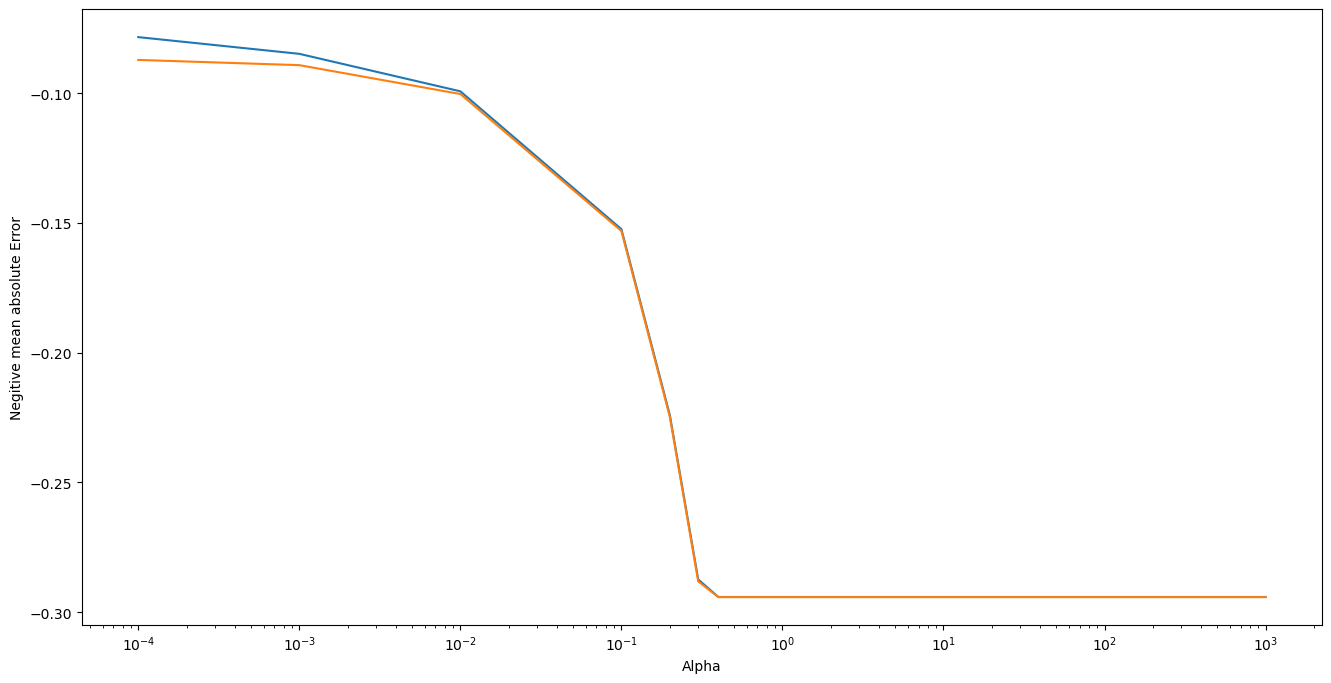

In [613]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [614]:
#checking for the alpha 0.001
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9092918148352487
0.8831181450768383


In [615]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = house_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0          MSSubClass  11.699068
4         OverallQual   0.129708
8            BsmtQual   0.127622
1         LotFrontage   0.098975
10        TotalBsmtSF   0.097760
46    Condition1_PosN   0.069267
3            LotShape   0.060506
65  RoofStyle_Mansard   0.056402
51    BldgType_2fmCon   0.054041
2             LotArea   0.053123

In [616]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0             OverallQual       0.0990
1             OverallCond       0.0531
2             TotalBsmtSF       0.0605
3               GrLivArea       0.1297
4            BsmtFullBath       0.0347
5             KitchenQual       0.0397
6              GarageCars       0.0507
7             MSZoning_FV       0.1276
8             MSZoning_RL       0.0978
9             MSZoning_RM      -0.0048
10        Condition1_Norm       0.0434
11        BldgType_Duplex      -0.0348
12         BldgType_Twnhs      -0.0467
13        RoofStyle_Gable      -0.0045
14    Exterior1st_BrkFace       0.0398
15    Exterior1st_Wd Sdng      -0.0230
16    Exterior2nd_MetalSd       0.0059
17    Exterior2nd_VinylSd       0.0183
18      Foundation_CBlock       0.0116
19       Foundation_PConc       0.0693
20      GarageType_Attchd       0.0405
21     GarageType_BuiltIn       0.0540
22   GarageType_No Garage      -0.0060
23           SaleType_New       0.0530
24   SaleCondition_Normal       0.0387
25  SaleCondition_Partial       0.0241
26   Neighborhood_Crawfor       0.0564
27   Neighborhood_Edwards      -0.0450
28    Neighborhood_IDOTRR      -0.0212
29     Neighborhood_NAmes      -0.0070
30   Neighborhood_NridgHt       0.0345
31   Neighborhood_OldTown      -0.0821
32     Neighborhood_SWISU      -0.0134

In [617]:
# Do an RFE to minimise the features

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm)            
rfe = rfe.fit(X_train_lasso, y_train)

In [618]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

tempLS_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
tempLS_df = tempLS_df.loc[tempLS_df['rfe_support'] == True]
tempLS_df.reset_index(drop=True, inplace=True)

tempLS_df['Coefficient'] = tempLS_df['Features'].apply(find)
tempLS_df = tempLS_df.sort_values(by=['Coefficient'], ascending=False)
tempLS_df = tempLS_df.head(10)
tempLS_df

Features  rfe_support  rfe_ranking  Coefficient
3              GrLivArea         True            1     0.129708
4            MSZoning_FV         True            1     0.127622
0            OverallQual         True            1     0.098975
5            MSZoning_RL         True            1     0.097760
8       Foundation_PConc         True            1     0.069267
2            TotalBsmtSF         True            1     0.060506
1            OverallCond         True            1     0.053123
9           SaleType_New         True            1     0.052968
10  SaleCondition_Normal         True            1     0.038680
13  Neighborhood_NridgHt         True            1     0.034480

### Comparing the results of both Ridge and Lasso Regression

In [619]:
#comparing the results of both Ridge and lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.918511          0.920401
1    R2Score Test          0.886604          0.888288
2       RSS Train         11.326017         11.063378
3        RSS Test          7.496127          7.384801
4       MSE Train          0.011676          0.011406
5        MSE Test          0.018020          0.017752

##### both ridge and lasso R2 score very similar to each other. but RSS train has noticeable difference.

### After compairing both the model we can see that the below Features are best explaining the DataSet

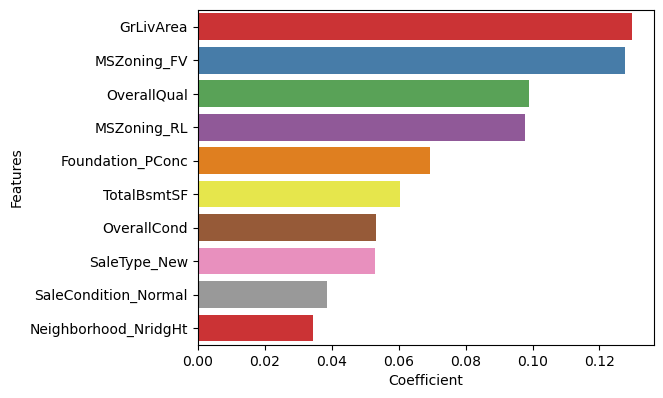

In [620]:

# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = tempLS_df)
plt.show()


## Conclusion :
 
##### Based on the Analysis it is found that the Significant variables in predicting the price of a house and how well those variables describe the price of a house:
 
- GrLivArea	  :Above grade (ground) living area square feet also has significant increase in the sales price.
- MSZoning_FV :Floating Village Residential also has significant effect in the sales price.
- OverallQual : Quality of over all house also has significant increase in the sales price.
- MSZoning_RL : Residential Low Density is good then it will also has significant effect on sales price.
- Foundation_PConc: Poured Contrete foundation has also significant impact on the sales price
- TotalBsmtSF	:Total square feet of basement area is also a reason to increase in salesprice
- OverallCond : If the Overall Condition is Excellent the SalePrice is higher
- SaleType_New : If New is sold then higher sale price
- SaleCondition_Normal: Normal Sale when compared to othersales has an improvement in the sales price
- Neighborhood_NridgHt: Sale price is high if in Northridge heights neighborhood

###### If the customer starts to focus on these varibles well they can notice significant increase in the sales price.
 
##### The optimal alpha value in case of Ridge and Lasso is as below:

- Ridge - 3.0
- Lasso - 0.0001


Also, based on the model comparison results, we notice that Lasso regression model has slightly higher R2 Scores and slightly lesser MSE value compared to Ridge Model. This suggests that the Lasso regression model is performing better in terms of prediction accuracy on your specific dataset.

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

## Analysis for the Subjective Questions

### Effect of doubling the alpha values for both Ridge and Lasso


#### Ridge Regression

In [621]:
ridge = Ridge(alpha=6.0)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.09315298  0.05201061  0.05799528  0.13245718  0.03558474  0.03904086
  0.04423126  0.10930087  0.01149084  0.07669754 -0.01486086 -0.00787684
  0.0160316   0.06676883  0.02522523  0.05380443  0.0266121  -0.05501348
 -0.06843629 -0.02346416 -0.0530511   0.01650818 -0.0330647  -0.01028697
 -0.0259419  -0.00227173 -0.05646942  0.07033246 -0.00222484  0.00812396
  0.00659503 -0.01625468 -0.04449519  0.01406124  0.01863043 -0.00222484
  0.03708826  0.03096603  0.00820377  0.04546947  0.01744077  0.03477514
  0.05009717  0.05502026  0.02481345  0.07943878  0.00145363 -0.01581338
  0.03650055  0.00280528  0.05726749 -0.00940428 -0.00021135 -0.03010097
  0.0390891   0.0180301  -0.00575059  0.04921465  0.03637739  0.02111458
  0.05372634  0.04921465 -0.00547746 -0.01460779  0.06764358 -0.06239125
 -0.05951931 -0.06287115 -0.02539012  0.05601865 -0.09300363 -0.06133784
  0.03566116]


In [622]:
#printing the values of R2, RSS, MSE for train and test

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric4.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric4.append(mse_test_lr)

r2_train:
0.9165607187809991
r2_test:
0.8857253376416429
RSS_train:
11.597069460398226
RSS_test:
7.55419628236016
MSE_train:
0.011955741711750748
MSE_test:
0.018159125678750384


In [623]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0            OverallQual       0.0932
1            OverallCond       0.0520
2            TotalBsmtSF       0.0580
3              GrLivArea       0.1325
4           BsmtFullBath       0.0356
..                   ...          ...
68    Neighborhood_NAmes      -0.0254
69  Neighborhood_NridgHt       0.0560
70  Neighborhood_OldTown      -0.0930
71    Neighborhood_SWISU      -0.0613
72  Neighborhood_Veenker       0.0357

[73 rows x 2 columns]

In [624]:
#feature reduction - taking top 10 features from ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0            OverallQual  11.679202
4           BsmtFullBath   0.132457
8            MSZoning_RH   0.109301
1            OverallCond   0.093153
46      Foundation_Stone   0.079439
10           MSZoning_RM   0.076698
28    Exterior1st_CBlock   0.070332
65  Neighborhood_Edwards   0.067644
14       Condition1_PosN   0.066769
3              GrLivArea   0.057995

#### Lasso Regression 

In [625]:
# Lasso Regression:

lm = Lasso(alpha=0.0002)
lm.fit(X_train,y_train)

#r2 train
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

#r2 test
y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))


0.9179948912436844
0.8863716057895481


In [626]:
# prnitng R2, RSS, MSE of test train when we double the alpha value for Lasso
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric5=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric5.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric5.append(mse_test_lr)

r2_train:
0.9179948912436844
r2_test:
0.8863716057895481
RSS_train:
11.397736515231813
RSS_test:
7.511474332108369
MSE_train:
0.01175024383013589
MSE_test:
0.01805642868295281


In [627]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lm.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0             OverallQual       0.0906
1             OverallCond       0.0519
2             TotalBsmtSF       0.0576
3               GrLivArea       0.1341
4            BsmtFullBath       0.0358
5             KitchenQual       0.0365
6              GarageCars       0.0443
7             MSZoning_FV       0.1814
8             MSZoning_RH       0.0588
9             MSZoning_RL       0.1352
10            MSZoning_RM       0.0440
11       Condition1_Feedr       0.0166
12        Condition1_Norm       0.0701
13        Condition1_PosN       0.0225
14        Condition1_RRAn       0.0630
15        Condition1_RRNn       0.0226
16        BldgType_Duplex      -0.0634
17         BldgType_Twnhs      -0.0825
18      HouseStyle_1.5Unf      -0.0186
19      HouseStyle_2.5Unf      -0.0683
20      HouseStyle_SFoyer       0.0191
21        RoofStyle_Gable      -0.0338
22          RoofStyle_Hip      -0.0259
23    Exterior1st_BrkComm      -0.1346
24    Exterior1st_BrkFace       0.0754
25    Exterior1st_Wd Sdng      -0.0515
26    Exterior1st_WdShing       0.0068
27    Exterior2nd_CmentBd       0.0510
28    Exterior2nd_HdBoard       0.0289
29    Exterior2nd_MetalSd       0.0457
30    Exterior2nd_Plywood       0.0339
31    Exterior2nd_VinylSd       0.0491
32    Exterior2nd_Wd Sdng       0.0616
33      Foundation_CBlock       0.0252
34       Foundation_PConc       0.0805
35      GarageType_Attchd       0.0358
36     GarageType_BuiltIn       0.0587
37   GarageType_No Garage      -0.0273
38           SaleType_CWD       0.0492
39           SaleType_New       0.0483
40           SaleType_Oth       0.0408
41   SaleCondition_Normal       0.0526
42  SaleCondition_Partial       0.0474
43   Neighborhood_Crawfor       0.0716
44   Neighborhood_Edwards      -0.0651
45    Neighborhood_IDOTRR      -0.0601
46   Neighborhood_MeadowV      -0.0844
47     Neighborhood_NAmes      -0.0276
48   Neighborhood_NridgHt       0.0639
49   Neighborhood_OldTown      -0.1014
50     Neighborhood_SWISU      -0.0733
51   Neighborhood_Veenker       0.0388

In [628]:
# Do an RFE to minimise the features

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm)            
rfe = rfe.fit(X_train_lasso, y_train)

In [629]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lm.coef_, index = X_train_lasso.columns))

# Assign top 10 features to a temp dataframe for further display in the bar plot
df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df['Coefficient'] = df['Features'].apply(find)
df = df.sort_values(by=['Coefficient'], ascending=False)
df = df.head(10)
df


Features  rfe_support  rfe_ranking  Coefficient
4            MSZoning_FV         True            1     0.343255
6            MSZoning_RL         True            1     0.294473
5            MSZoning_RH         True            1     0.239227
7            MSZoning_RM         True            1     0.203088
2              GrLivArea         True            1     0.135258
16          SaleType_CWD         True            1     0.128552
17          SaleType_Oth         True            1     0.108840
0            OverallQual         True            1     0.086154
20  Neighborhood_Crawfor         True            1     0.079140
22  Neighborhood_NridgHt         True            1     0.073243

In [630]:
#Comparing results of Ridge and Lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric4}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric5, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.916561          0.917995
1    R2Score Test          0.885725          0.886372
2       RSS Train         11.597069         11.397737
3        RSS Test          7.554196          7.511474
4       MSE Train          0.011956          0.011750
5        MSE Test          0.018159          0.018056

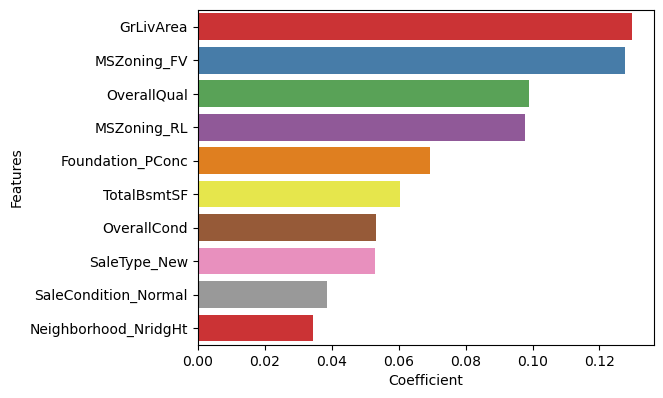

In [631]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = tempLS_df)
plt.show()

### Question 3 Analysis

In [632]:
houseLasso = houseNew
houseLasso = houseLasso.drop(["GrLivArea","MSZoning_FV", "OverallQual", "MSZoning_RL", "Foundation_PConc"], axis=1)

In [633]:
df_train, df_test = train_test_split(houseLasso, train_size=0.7,test_size = 0.3, random_state=100)

In [634]:
num_col =['MSSubClass','LotArea','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [635]:
X_trainLS = df_train
y_trainLS = df_train.pop('SalePrice')

X_testLS = df_test
y_testLS = df_test.pop('SalePrice')

In [636]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm)            
rfe = rfe.fit(X_trainLS, y_trainLS)

In [637]:
# Assign the columns selected by RFE to cols

col = X_trainLS.columns[rfe.support_]

# assign the features selected using RFE to a dataframe and view them

temp1 = pd.DataFrame(list(zip(X_trainLS.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp1 = temp1.loc[temp1['rfe_support'] == True]
temp1.reset_index(drop=True, inplace=True)

temp1

Variable  rfe_support  rfe_ranking
0            OverallCond         True            1
1            TotalBsmtSF         True            1
2               1stFlrSF         True            1
3               2ndFlrSF         True            1
4            KitchenQual         True            1
..                   ...          ...          ...
66  Neighborhood_OldTown         True            1
67    Neighborhood_SWISU         True            1
68   Neighborhood_Sawyer         True            1
69  Neighborhood_Somerst         True            1
70  Neighborhood_StoneBr         True            1

[71 rows x 3 columns]

In [638]:
# Assign the columns to X_train_rfe

X_trainLS_rfe = X_trainLS[col]
# Associate the new columns to X_train and X_test for further analysis

X_trainLS = X_trainLS_rfe[X_trainLS_rfe.columns]
X_testLS =  X_testLS[X_trainLS.columns]

In [639]:
# Lasso Regression:

lm = Lasso(alpha=0.0001)
lm.fit(X_trainLS,y_trainLS)

y_train_predLS = lm.predict(X_trainLS)
print(r2_score(y_true=y_trainLS,y_pred=y_train_predLS))

y_test_predLS  = lm.predict(X_testLS)
print(r2_score(y_true=y_testLS,y_pred=y_test_predLS))

0.8982984737353366
0.8601346512354685


In [640]:
#printing R2, RSS, MSE results
r2_train_lr = r2_score(y_trainLS ,y_train_predLS )
print(r2_train_lr)


r2_test_lr = r2_score(y_testLS, y_test_predLS)
print(r2_test_lr)


rss1_lr = np.sum(np.square(y_trainLS-y_train_predLS))
print(rss1_lr)


rss2_lr = np.sum(np.square(y_testLS - y_test_predLS))
print(rss2_lr)


mse_train_lr = mean_squared_error(y_trainLS,y_train_predLS)
print(mse_train_lr)


mse_test_lr = mean_squared_error(y_testLS , y_test_predLS)
print(mse_test_lr)


0.8982984737353366
0.8601346512354685
14.135304704077834
9.24588422195204
0.0145724790763689
0.022225683225846248


In [641]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feature       Coef
0           MSSubClass  11.841632
47     BldgType_2fmCon   0.136014
66  Exterior1st_CBlock   0.118945
43     Condition1_RRAe   0.118035
17         KitchenQual   0.115176
52   HouseStyle_1Story   0.114784
51   HouseStyle_1.5Unf   0.110804
3             LotShape   0.110253
4          OverallCond   0.106925
41     Condition1_PosA   0.098840